In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import umap.umap_ as umap
import matplotlib.pyplot as plt
metadata = pd.read_csv("20200711_patchseq_metadata_mouse.csv")
metadata.head()

project  cell_specimen_id                 cell_specimen_name hemisphere  \
0  mIVSCC-MET         601506507  Vip-IRES-Cre;Ai14-331294.04.01.01       left   
1  mIVSCC-MET         601790961  Sst-IRES-Cre;Ai14-331663.04.01.01       left   
2  mIVSCC-MET         601803754  Sst-IRES-Cre;Ai14-331663.04.02.02      right   
3  mIVSCC-MET         601808698  Sst-IRES-Cre;Ai14-331663.04.02.03      right   
4  mIVSCC-MET         601810307  Sst-IRES-Cre;Ai14-331663.04.02.04      right   

  structure  donor_id                donor_name biological_sex  age  \
0    VISpm4    331294  Vip-IRES-Cre;Ai14-331294              M  P55   
1    VISpm5    331663  Sst-IRES-Cre;Ai14-331663              F  P57   
2   VISp2/3    331663  Sst-IRES-Cre;Ai14-331663              F  P57   
3     VISp5    331663  Sst-IRES-Cre;Ai14-331663              F  P57   
4   VISp2/3    331663  Sst-IRES-Cre;Ai14-331663              F  P57   

   ethnicity  ...  apical_dendrite_status neuron_reconstruction_type  \
0        NaN  ...                     NaN                       full   
1        NaN  ...                     NaN                       full   
2        NaN  ...                     NaN                       full   
3        NaN  ...                     NaN                       full   
4        NaN  ...                     NaN                       full   

  cell_soma_normalized_depth depth_from_pia_um ephys_session_id  \
0                   0.361015               NaN        601506492   
1                   0.621829               NaN        601790945   
2                   0.164240               NaN        601803733   
3                   0.483030               NaN        601808619   
4                   0.295656               NaN        601810292   

   transcriptomics_sample_id  transcriptomics_batch  T-type Accession ID  \
0           PS0810_E1-50_S88                  BT035       CS180626100018   
1           PS0817_E1-50_S19                  BT036       CS180626100041   
2           PS0817_E1-50_S25                  BT036       CS180626100035   
3           PS0817_E1-50_S26                  BT036       CS180626100043   
4           PS0817_E1-50_S27                  BT036       CS180626100034   

       T-type Label MET-type Label  
0  Vip Gpc3 Slc18a3      Vip-MET-2  
1     Sst Tac2 Myh4            NaN  
2  Sst Calb2 Pdlim5      Sst-MET-3  
3    Sst Hpse Cbln4      Sst-MET-8  
4  Sst Calb2 Necab1      Sst-MET-3  

[5 rows x 23 columns]

In [6]:
file_manifest = pd.read_excel("2021-09-13_mouse_file_manifest.xlsx")
#file_manifest = pd.read_excel(r"C:\Users\75976\OneDrive\桌面\2021-09-13_mouse_file_manifest.xls")

file_manifest.head()

file_id                                   file_name  file_size  \
0  601506507                            601506507.marker        268   
1  601506507                           601506507_raw.swc     160503   
2  601506507                   601506507_transformed.swc     271764   
3  601506492     sub-599387254_ses-601506492_icephys.nwb   17881801   
4  609481756  PS0810_E1-50_GCTCATGA-TCTCTCCG_R2.fastq.gz   48014090   

                                     sha256_checksum  \
0  305938ce75d55c3f43fbbe2d1d57e203139fa0c357bd73...   
1  6c82f5f974e4f6d2336a3606d4955823edd3c0173da60d...   
2  bad13a99c8f7f8a375e43109d80fd23d7028555a7dc42b...   
3  54003c5b599fa8081938713e8c7c3b69d1883b31b3ada1...   
4  a2954fc88cb34bc30b9bca9e9f1a0cff2c9b53cf9a7268...   

                       md5_checksum                        technique  \
0  ecf2285ccbf5274af7d6a31a855ce950                       morphology   
1  7cc7ccdd627ef83fe54fcbf0feac79c2                       morphology   
2  f6a365d86ff65370af26439f0f16caaf                       morphology   
3  d854a21668f5f2229024d8cf0975de54  intracellular_electrophysiology   
4  fc9441d44f1fab3e5b31cbb2c57228b0                  transcriptomics   

         file_type archive                                        archive_uri  \
0       marker_swc     BIL  ftp://download.brainlib.org:8811/biccn/zeng/ps...   
1          raw_swc     BIL  ftp://download.brainlib.org:8811/biccn/zeng/ps...   
2  transformed_swc     BIL  ftp://download.brainlib.org:8811/biccn/zeng/ps...   
3              nwb   DANDI  https://api.dandiarchive.org/api/assets/e734ba...   
4    reverse_fastq    NEMO  http://data.nemoarchive.org/other/AIBS/AIBS_pa...   

      project  cell_specimen_id  
0  mIVSCC-MET       601506507.0  
1  mIVSCC-MET       601506507.0  
2  mIVSCC-MET       601506507.0  
3  mIVSCC-MET       601506507.0  
4  mIVSCC-MET       601506507.0

In [10]:
gene_data = pd.read_csv(
    "20200513_Mouse_PatchSeq_Release_cpm.v2.csv",
    index_col=0,
)

In [55]:
gene_data

PS0810_E1-50_S88  PS0817_E1-50_S19  PS0817_E1-50_S25  \
0610005C13Rik               0.0               0.0          0.000000   
0610006L08Rik               0.0               0.0          0.000000   
0610007P14Rik               0.0               0.0          0.000000   
0610009B22Rik               0.0               0.0         69.658825   
0610009E02Rik               0.0               0.0          0.000000   
...                         ...               ...               ...   
n-R5s142                    0.0               0.0          0.000000   
n-R5s143                    0.0               0.0          0.000000   
n-R5s144                    0.0               0.0          0.000000   
n-R5s146                    0.0               0.0          0.000000   
n-R5s149                    0.0               0.0          0.000000   

               PS0817_E1-50_S26  PS0817_E1-50_S27  PS0817_E1-50_S28  \
0610005C13Rik          0.000000          0.000000          0.000000   
0610006L08Rik          0.000000          0.000000          0.000000   
0610007P14Rik        152.239614        165.312294         58.189895   
0610009B22Rik          0.000000          0.000000          0.000000   
0610009E02Rik          0.000000          0.000000          1.662568   
...                         ...               ...               ...   
n-R5s142               0.000000          0.000000          0.000000   
n-R5s143               0.000000          0.000000          0.000000   
n-R5s144               0.000000          0.000000          0.000000   
n-R5s146               0.000000          0.000000          0.000000   
n-R5s149               0.000000          0.000000          0.000000   

               PS0817_E1-50_S46  PS0817_E1-50_S52  PS0830_E1-50_S17  \
0610005C13Rik          0.000000          0.000000           0.00000   
0610006L08Rik          0.000000          0.000000           0.00000   
0610007P14Rik          0.000000          0.000000         551.71563   
0610009B22Rik          0.000000         57.335504           0.00000   
0610009E02Rik         33.786897          0.000000           0.00000   
...                         ...               ...               ...   
n-R5s142               0.000000          0.000000           0.00000   
n-R5s143               0.000000          0.000000           0.00000   
n-R5s144               0.000000          0.000000           0.00000   
n-R5s146               0.000000          0.000000           0.00000   
n-R5s149               0.000000          0.000000           0.00000   

               PS0830_E1-50_S19  ...  SM-J39ZH_S561_E1-50  \
0610005C13Rik          0.000000  ...             0.000000   
0610006L08Rik          0.000000  ...             0.000000   
0610007P14Rik        109.361330  ...             0.000000   
0610009B22Rik         78.641855  ...            52.858114   
0610009E02Rik          0.000000  ...             0.000000   
...                         ...  ...                  ...   
n-R5s142               0.000000  ...             0.000000   
n-R5s143               0.000000  ...             0.000000   
n-R5s144               0.000000  ...             0.000000   
n-R5s146               0.000000  ...             0.000000   
n-R5s149               0.000000  ...             0.000000   

               SM-J39ZH_S562_E1-50  SM-J39ZH_S565_E1-50  SM-J39ZH_S566_E1-50  \
0610005C13Rik                  0.0             0.000000              0.00000   
0610006L08Rik                  0.0             0.000000              0.00000   
0610007P14Rik                  0.0            32.223984              0.00000   
0610009B22Rik                  0.0            27.620558             27.46475   
0610009E02Rik                  0.0            20.715418              0.00000   
...                            ...                  ...                  ...   
n-R5s142                       0.0             0.000000              0.00000   
n-R5s143                       0.0             0.000000              0.00000   
n-R

C:\Users\75976\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


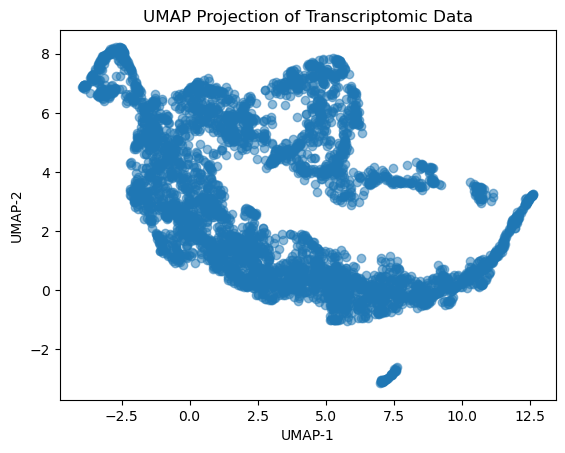

In [11]:
# Assuming gene_data is your DataFrame with genes as rows and samples as columns
# Randomly sample genes for quicker UMAP execution
sampled_genes = shuffle(gene_data.index, random_state=42)[:4000]
sampled_gene_data = gene_data.loc[sampled_genes]

# Initialize and fit UMAP
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(sampled_gene_data.transpose())  # Ensure correct orientation

# Plot the embedding
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5)
plt.title('UMAP Projection of Transcriptomic Data')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.show()

In [12]:
gene_data 

PS0810_E1-50_S88  PS0817_E1-50_S19  PS0817_E1-50_S25  \
0610005C13Rik               0.0               0.0          0.000000   
0610006L08Rik               0.0               0.0          0.000000   
0610007P14Rik               0.0               0.0          0.000000   
0610009B22Rik               0.0               0.0         69.658825   
0610009E02Rik               0.0               0.0          0.000000   
...                         ...               ...               ...   
n-R5s142                    0.0               0.0          0.000000   
n-R5s143                    0.0               0.0          0.000000   
n-R5s144                    0.0               0.0          0.000000   
n-R5s146                    0.0               0.0          0.000000   
n-R5s149                    0.0               0.0          0.000000   

               PS0817_E1-50_S26  PS0817_E1-50_S27  PS0817_E1-50_S28  \
0610005C13Rik          0.000000          0.000000          0.000000   
0610006L08Rik          0.000000          0.000000          0.000000   
0610007P14Rik        152.239614        165.312294         58.189895   
0610009B22Rik          0.000000          0.000000          0.000000   
0610009E02Rik          0.000000          0.000000          1.662568   
...                         ...               ...               ...   
n-R5s142               0.000000          0.000000          0.000000   
n-R5s143               0.000000          0.000000          0.000000   
n-R5s144               0.000000          0.000000          0.000000   
n-R5s146               0.000000          0.000000          0.000000   
n-R5s149               0.000000          0.000000          0.000000   

               PS0817_E1-50_S46  PS0817_E1-50_S52  PS0830_E1-50_S17  \
0610005C13Rik          0.000000          0.000000           0.00000   
0610006L08Rik          0.000000          0.000000           0.00000   
0610007P14Rik          0.000000          0.000000         551.71563   
0610009B22Rik          0.000000         57.335504           0.00000   
0610009E02Rik         33.786897          0.000000           0.00000   
...                         ...               ...               ...   
n-R5s142               0.000000          0.000000           0.00000   
n-R5s143               0.000000          0.000000           0.00000   
n-R5s144               0.000000          0.000000           0.00000   
n-R5s146               0.000000          0.000000           0.00000   
n-R5s149               0.000000          0.000000           0.00000   

               PS0830_E1-50_S19  ...  SM-J39ZH_S561_E1-50  \
0610005C13Rik          0.000000  ...             0.000000   
0610006L08Rik          0.000000  ...             0.000000   
0610007P14Rik        109.361330  ...             0.000000   
0610009B22Rik         78.641855  ...            52.858114   
0610009E02Rik          0.000000  ...             0.000000   
...                         ...  ...                  ...   
n-R5s142               0.000000  ...             0.000000   
n-R5s143               0.000000  ...             0.000000   
n-R5s144               0.000000  ...             0.000000   
n-R5s146               0.000000  ...             0.000000   
n-R5s149               0.000000  ...             0.000000   

               SM-J39ZH_S562_E1-50  SM-J39ZH_S565_E1-50  SM-J39ZH_S566_E1-50  \
0610005C13Rik                  0.0             0.000000              0.00000   
0610006L08Rik                  0.0             0.000000              0.00000   
0610007P14Rik                  0.0            32.223984              0.00000   
0610009B22Rik                  0.0            27.620558             27.46475   
0610009E02Rik                  0.0            20.715418              0.00000   
...                            ...                  ...                  ...   
n-R5s142                       0.0             0.000000              0.00000   
n-R5s143                       0.0             0.000000              0.00000   
n-R

In [23]:
#gene_variances = gene_data.var(axis=1)

# Calculate mean expression for filtering lowly expressed genes
#gene_means = gene_data.mean(axis=1)

# Define thresholds for variance and mean expression
#variance_threshold = gene_variances.quantile(0.90)  # top 10% variance
#mean_threshold = gene_means.quantile(0.10)  # above bottom 10% mean expression

# Select genes that meet both criteria
#selected_genes = gene_data.loc[(gene_variances > variance_threshold) & (gene_means > mean_threshold)]

# Save the selected genes to a CSV file
#selected_genes.index.to_series().to_csv('select_markers.csv', header=['Gene'])

#print(f"Selected {len(selected_genes)} marker genes based on variability and expression levels.")

In [24]:
import umap.umap_ as umap

marker_genes_for_umap = pd.read_csv("select_markers.csv", index_col=0)

embedding = umap.UMAP(n_neighbors=25).fit_transform(
    np.log2(gene_data.loc[marker_genes_for_umap["Gene"], :].values.T + 1)
)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

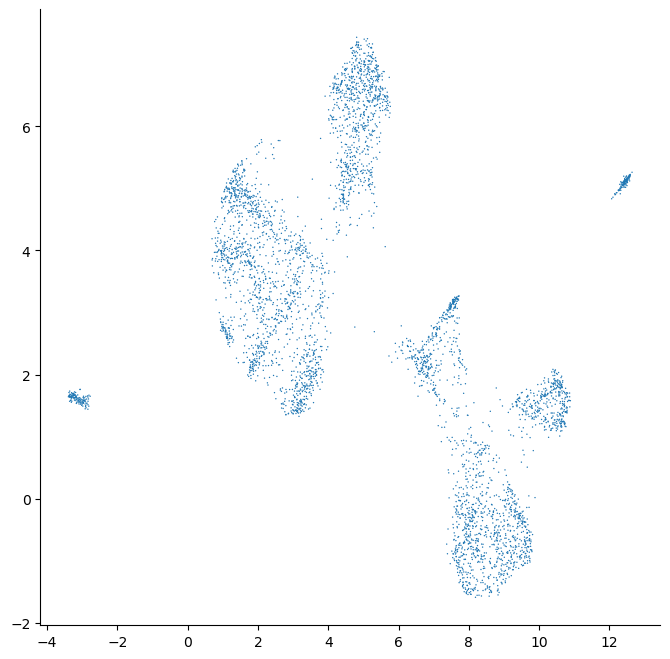

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(*embedding.T, s=1, edgecolor="none")
sns.despine()

In [27]:
# Identify the cells from a particular t-type (Lamp5 Plch2 Dock5)
my_ttype_metadata = metadata.loc[metadata["T-type Label"] == "Lamp5 Plch2 Dock5", :]

my_ttype_metadata

project  cell_specimen_id                     cell_specimen_name  \
128   mIVSCC-MET         640319052      Oxtr-T2A-Cre;Ai14-351472.04.01.02   
140   mIVSCC-MET         642442513  Ndnf-IRES2-dgCre;Ai14-353735.03.02.01   
143   mIVSCC-MET         642496703     Gad2-IRES-Cre;Ai14-352686.03.02.01   
153   mIVSCC-MET         642833509  Ndnf-IRES2-dgCre;Ai14-353737.04.02.01   
154   mIVSCC-MET         642842839  Ndnf-IRES2-dgCre;Ai14-353737.04.01.01   
...          ...               ...                                    ...   
4104  mIVSCC-MET         891514933  Ndnf-IRES2-dgCre;Ai14-470196.04.01.02   
4108  mIVSCC-MET         891652412  Ndnf-IRES2-dgCre;Ai14-470196.03.01.02   
4109  mIVSCC-MET         891664096  Ndnf-IRES2-dgCre;Ai14-470196.05.01.01   
4168  mIVSCC-MET         901179274     Gad2-IRES-Cre;Ai14-473098.03.01.02   
4286  mIVSCC-MET         934799128      Oxtr-T2A-Cre;Ai14-484066.03.01.01   

     hemisphere structure  donor_id                    donor_name  \
128        left     VISp1    351472      Oxtr-T2A-Cre;Ai14-351472   
140       right     VISp1    353735  Ndnf-IRES2-dgCre;Ai14-353735   
143       right     VISp1    352686     Gad2-IRES-Cre;Ai14-352686   
153       right     VISp1    353737  Ndnf-IRES2-dgCre;Ai14-353737   
154        left   VISp2/3    353737  Ndnf-IRES2-dgCre;Ai14-353737   
...         ...       ...       ...                           ...   
4104       left     VISp1    470196  Ndnf-IRES2-dgCre;Ai14-470196   
4108       left     VISp1    470196  Ndnf-IRES2-dgCre;Ai14-470196   
4109       left   VISp2/3    470196  Ndnf-IRES2-dgCre;Ai14-470196   
4168       left   VISp2/3    473098     Gad2-IRES-Cre;Ai14-473098   
4286       left   VISp2/3    484066      Oxtr-T2A-Cre;Ai14-484066   

     biological_sex  age  ethnicity  ...  apical_dendrite_status  \
128               F  P49        NaN  ...                     NaN   
140               M  P39        NaN  ...                     NaN   
143               M  P45        NaN  ...                     NaN   
153               M  P40        NaN  ...                     NaN   
154               M  P40        NaN  ...                     NaN   
...             ...  ...        ...  ...                     ...   
4104              F  P55        NaN  ...                     NaN   
4108              F  P55        NaN  ...                     NaN   
4109              F  P55        NaN  ...                     NaN   
4168              F  P56        NaN  ...                     NaN   
4286              M  P55        NaN  ...                     NaN   

     neuron_reconstruction_type cell_soma_normalized_depth depth_from_pia_um  \
128                         NaN                        NaN               NaN   
140                         NaN                        NaN               NaN   
143                         NaN                        NaN               NaN   
153                         NaN                        NaN               NaN   
154                         NaN                        NaN               NaN   
...                         ...                        ...               ...   
4104                        NaN                        NaN               NaN   
4108                        NaN                        NaN               NaN   
4109                        NaN                        NaN               NaN   
4168                        NaN                        NaN               NaN   
4286                        NaN                        NaN               NaN   

     ephys_session_id  transcriptomics_sample_id  transcriptomics_batch  \
128         640318956        SM-GE65C_S142_E1-50                RSC-126   
140         642442471        SM-GE65C_S188_E1-50                RSC-126   
143         642496688        SM-GE65C_S189_E1-50                RSC-126   
153         642833493        SM-GE652_S154_E1-50                RSC-127   
154         642842794        SM-GE652_S164_E1-50                RSC-127   
...               ...      

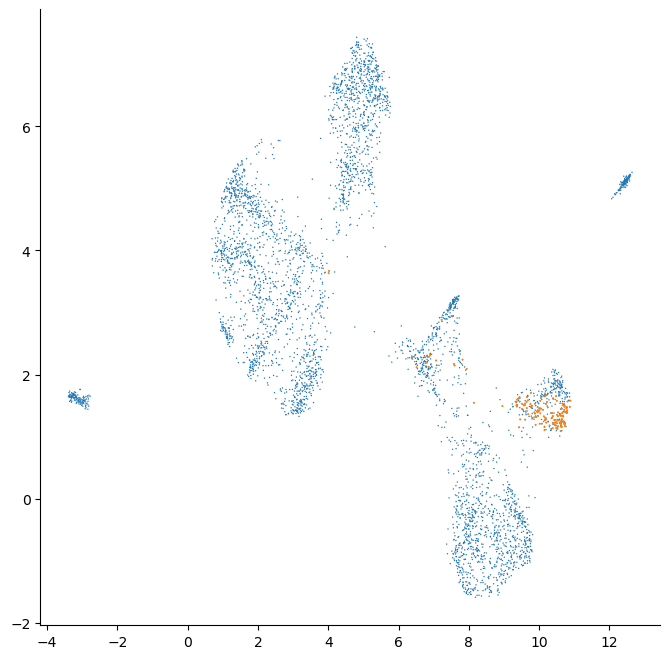

In [28]:
my_ttype_mask = gene_data.columns.isin(my_ttype_metadata["transcriptomics_sample_id"].tolist())

plt.figure(figsize=(8, 8))
plt.scatter(*embedding.T, s=1, edgecolor="none")
plt.scatter(*embedding[my_ttype_mask, :].T, s=2, edgecolor="none")
sns.despine()

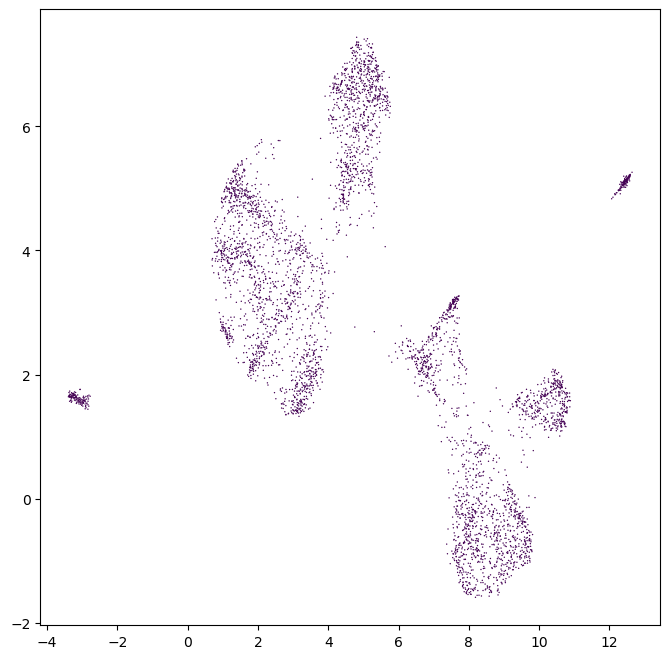

In [29]:
plt.figure(figsize=(8, 8))
plt.scatter(
    *embedding.T,
    s=1,
    c=gene_data.loc["Drd2", :].values,
    vmin=0,
    vmax=5e3,
    cmap="viridis",
    edgecolor="none"
)

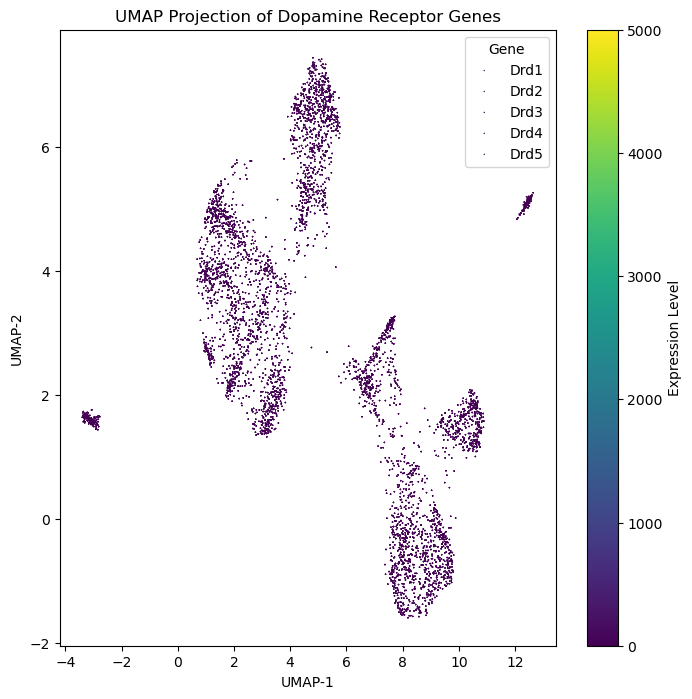

In [30]:
# 设置亮丽的颜色
colors = sns.color_palette("tab10", n_colors=5)
gene_names = ['Drd1', 'Drd2', 'Drd3', 'Drd4', 'Drd5']

plt.figure(figsize=(8, 8))

# 对每个多巴胺受体基因绘制UMAP图
for i, gene in enumerate(gene_names):
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        s=1,
        c=gene_data.loc[gene, :].values,  # 假设每行是一个基因，每列是一个样本
        vmin=0,
        vmax=5e3,
        cmap="viridis",  # 使用明亮的颜色映射
        edgecolor="none",
        label=gene
    )

plt.colorbar(label='Expression Level')  # 添加颜色条
plt.title('UMAP Projection of Dopamine Receptor Genes')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend(title='Gene')
plt.show()

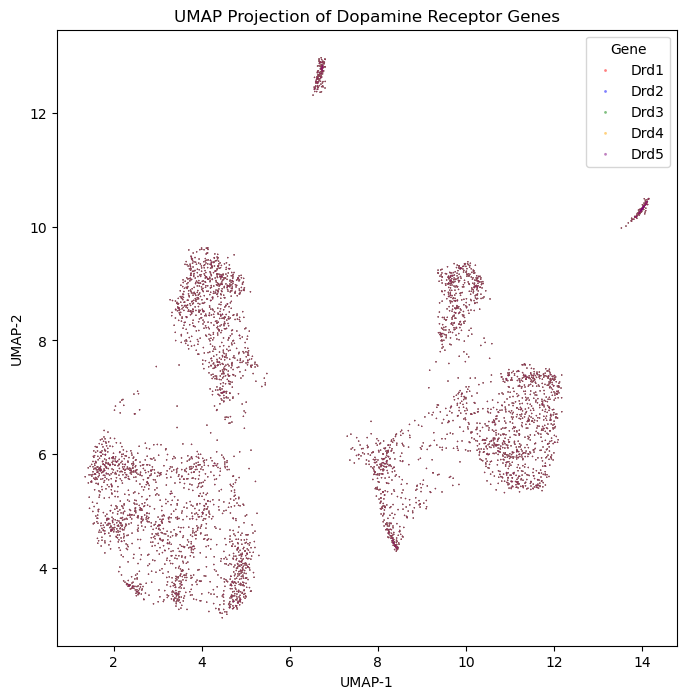

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# 为每个Drd基因指定一个颜色
colors = ['red', 'blue', 'green', 'orange', 'purple']  # 明亮且容易区分的颜色
gene_names = ['Drd1', 'Drd2', 'Drd3', 'Drd4', 'Drd5']

plt.figure(figsize=(8, 8))

# 假设 embedding 是已经计算好的UMAP降维结果
# 假设 gene_data 是DataFrame，索引为基因名称，列为样本

# 绘制每个多巴胺受体基因的UMAP图
for gene, color in zip(gene_names, colors):
    # 获取基因对应的表达数据
    gene_expression = gene_data.loc[gene, :].values
    
    # 绘制散点图
    plt.scatter(
        embedding[:, 0],  # UMAP的第一维
        embedding[:, 1],  # UMAP的第二维
        s=1,              # 点的大小
        c=color,          # 指定基因的颜色
        label=gene,       # 图例标签
        edgecolor='none', # 去除点的边框，使图更清晰
        alpha=0.5         # 点的透明度
    )

plt.title('UMAP Projection of Dopamine Receptor Genes')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend(title='Gene', markerscale=2)  # 显示图例，调整图例标记的大小
plt.show()


In [69]:
# 确定与多巴胺相关的基因
dopamine_genes = ['Drd1', 'Drd2', 'Drd3', 'Drd4', 'Drd5']  # 假设基因数据已按此类格式标准化

# 过滤出包含这些基因的数据
dopamine_gene_data = gene_data.loc[gene_data.index.isin(dopamine_genes)]

# 标记出特定 T-type 的细胞
t_type_label = "Lamp5 Plch2 Dock5"
selected_metadata = metadata[metadata["T-type Label"] == t_type_label]
selected_samples = selected_metadata["transcriptomics_sample_id"].tolist()
sample_mask = gene_data.columns.isin(selected_samples)

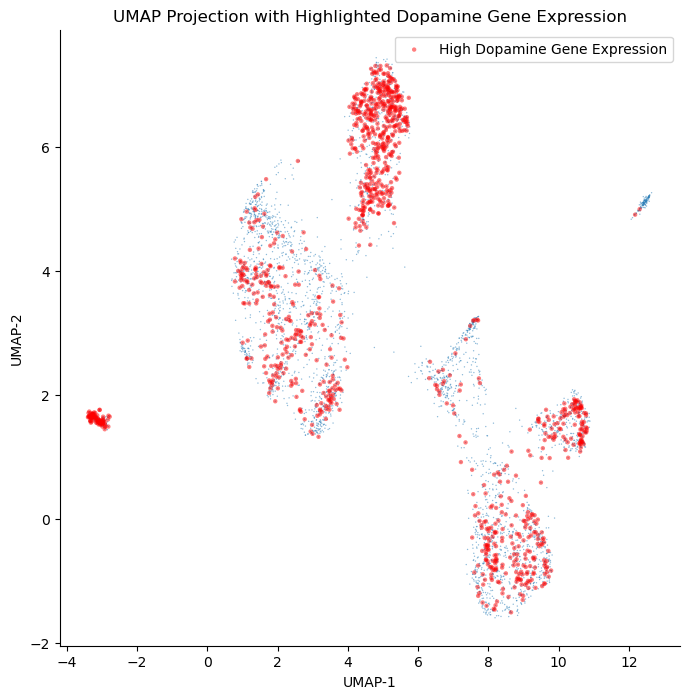

In [70]:
dopamine_expression = gene_data.loc[dopamine_genes]
# 计算多巴胺受体基因表达的75%分位数阈值
threshold = dopamine_expression.mean(axis=0).quantile(0.75)

# 创建一个布尔索引数组，表达水平高于阈值的样本
high_expression_mask = (dopamine_expression.mean(axis=0) > threshold)

# 假设你已经从基因表达数据集中计算出了多巴胺受体基因的平均表达水平
# 并创建了一个表达水平高于某阈值的样本的布尔索引数组
threshold = dopamine_expression.mean(axis=0).quantile(0.75)
high_expression_mask = (dopamine_expression.mean(axis=0) > threshold)  # 阈值根据数据调整

# 再次绘制UMAP，突出显示多巴胺基因表达高的样本
plt.figure(figsize=(8, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=1, edgecolor="none", alpha=0.5)  # 所有样本
plt.scatter(embedding[high_expression_mask, 0], embedding[high_expression_mask, 1], color='red', s=10, edgecolor='none',alpha=0.5, label='High Dopamine Gene Expression')  # 突出显示
sns.despine()  # 移除图框线
plt.title('UMAP Projection with Highlighted Dopamine Gene Expression')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()
plt.show()


In [33]:
# 获取 'T-type Label' 列中所有唯一的值
unique_labels = metadata['T-type Label'].unique()

# 打印不同类型的数量和具体类型
print(f"Total unique 'T-type Label' types: {len(unique_labels)}")
print("Unique 'T-type Label' types:", unique_labels)

# 或者更直接地使用 nunique() 函数来计算唯一值的数量
unique_count = metadata['T-type Label'].nunique()
print(f"Total unique 'T-type Label' types using nunique(): {unique_count}")


Total unique 'T-type Label' types: 63
Unique 'T-type Label' types: ['Vip Gpc3 Slc18a3' 'Sst Tac2 Myh4' 'Sst Calb2 Pdlim5' 'Sst Hpse Cbln4'
 'Sst Calb2 Necab1' 'Sst Esm1' 'Vip Pygm C1ql1' 'Vip Lmo1 Myl1'
 'Vip Crispld2 Kcne4' 'Pvalb Tpbg' 'Pvalb Vipr2' 'Vip Rspo4 Rxfp1 Chat'
 'Pvalb Reln Itm2a' 'Sst Tac1 Tacr3' nan 'Sst Tac1 Htr1d'
 'Sst Hpse Sema3c' 'Sst Rxfp1 Prdm8' 'Sst Myh8 Etv1 ' 'Vip Col15a1 Pde1a'
 'Vip Ptprt Pkp2' 'Lamp5 Lsp1' 'Vip Chat Htr1f' 'Sncg Vip Itih5'
 'Vip Lect1 Oxtr' 'Vip Igfbp6 Car10' 'Vip Igfbp4 Mab21l1'
 'Lamp5 Ntn1 Npy2r' 'Pvalb Sema3e Kank4' 'Vip Rspo1 Itga4' 'Pvalb Th Sst'
 'Vip Crispld2 Htr2c' 'Vip Lmo1 Fam159b' 'Sst Rxfp1 Eya1'
 'Pvalb Gpr149 Islr' 'Lamp5 Fam19a1 Tmem182' 'Sst Mme Fam114a1'
 'Sst Chodl' 'Sst Crh 4930553C11Rik ' 'Sst Nr2f2 Necab1'
 'Lamp5 Plch2 Dock5' 'Vip Igfbp6 Pltp' 'Serpinf1 Clrn1'
 'Serpinf1 Aqp5 Vip' 'Sst Myh8 Fibin' 'Sncg Vip Nptx2' 'Sst Tac2 Tacstd2'
 'Lamp5 Krt73' 'Pvalb Calb1 Sst' 'Pvalb Akr1c18 Ntf3' 'Pvalb Gabrg1'
 'Pvalb Reln Tac1'

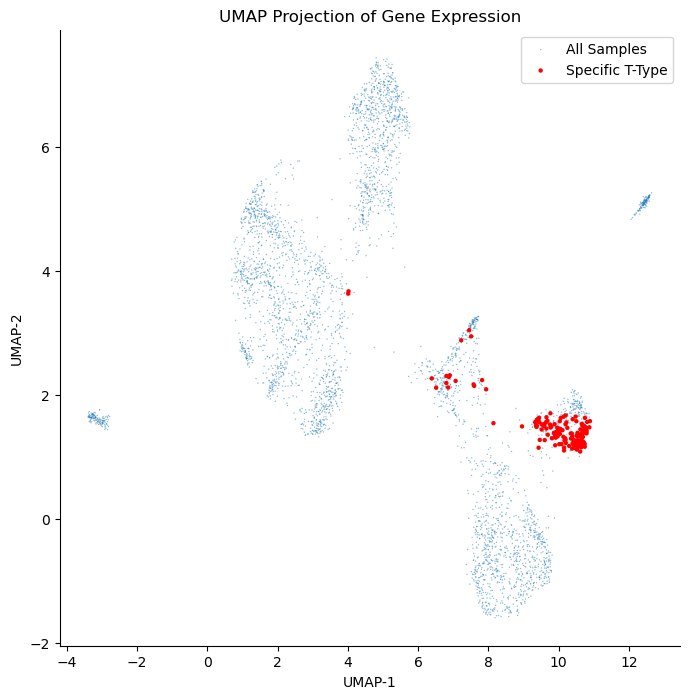

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 embedding 是用 UMAP 得到的降维结果，且已正确计算
plt.figure(figsize=(8, 8))

# 绘制所有样本
plt.scatter(embedding[:, 0], embedding[:, 1], s=1, edgecolor="none", alpha=0.5, label='All Samples')

# 如果你想突出显示特定 T-type 的样本
# 假设 sample_mask 是一个确定哪些样本属于特定 T-type 的布尔数组
plt.scatter(embedding[sample_mask, 0], embedding[sample_mask, 1], color='red', s=10, edgecolor='none', label='Specific T-Type')

plt.title('UMAP Projection of Gene Expression')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend()

sns.despine()  # 使用 seaborn 的 despine 函数去除边框
plt.show()


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 metadata 是包含 'T-type Label' 的 DataFrame
# 假设 embedding 是使用 UMAP 计算得到的降维结果，每行对应 metadata 中的一行

unique_t_types = metadata['T-type Label'].dropna().unique()
colors = sns.color_palette("hsv", len(unique_t_types))  # 生成颜色

# 映射每个 T-type 到一个颜色
t_type_to_color = {t_type: color for t_type, color in zip(unique_t_types, colors)}


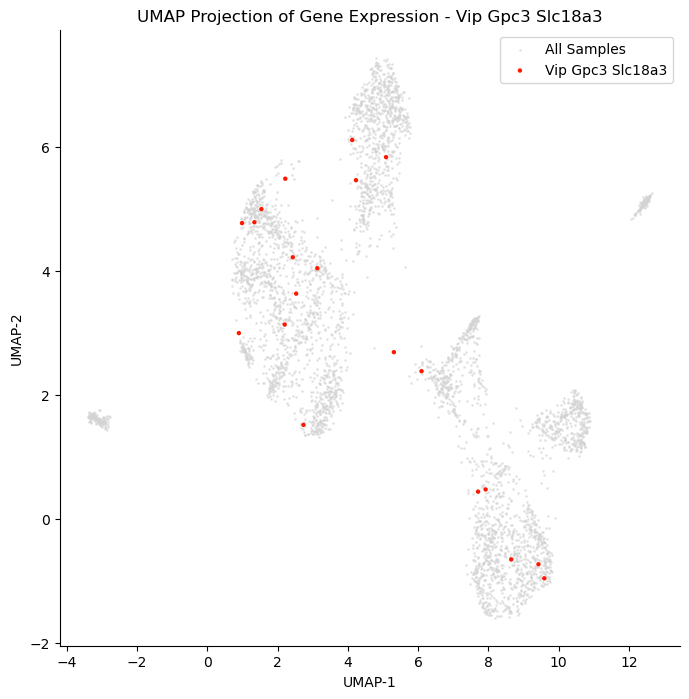

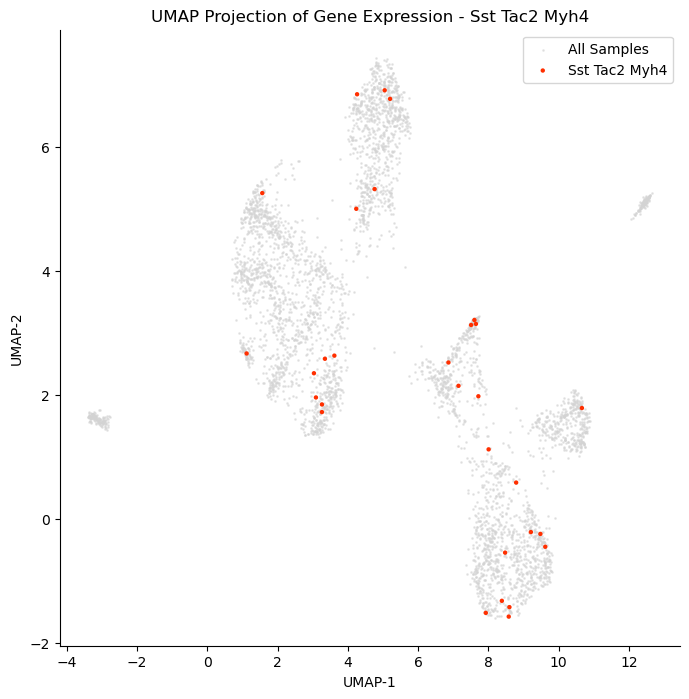

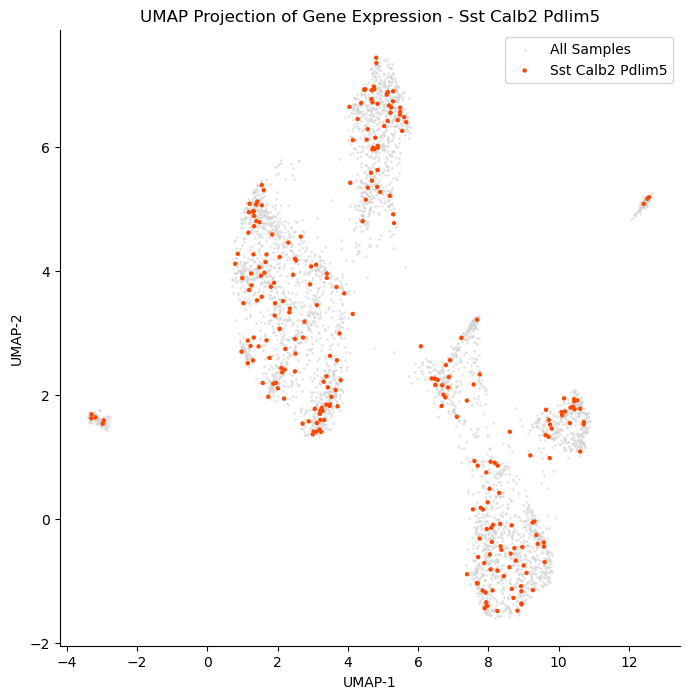

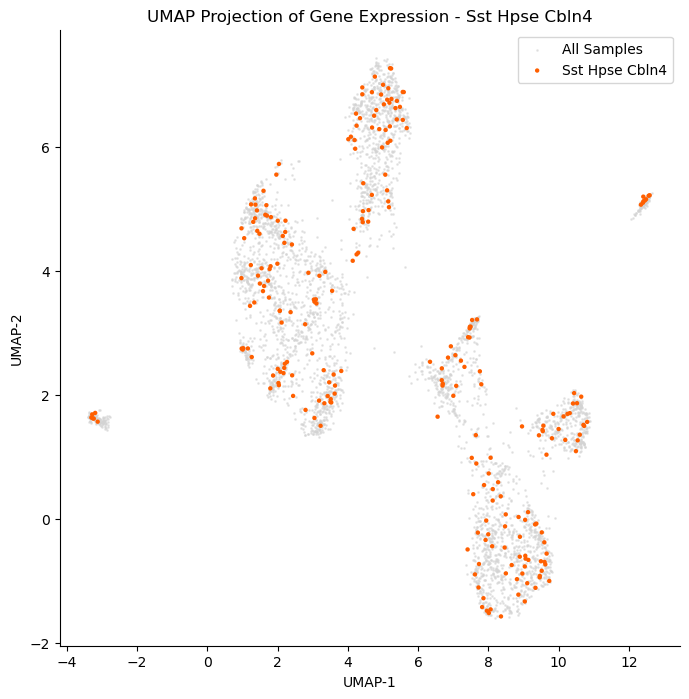

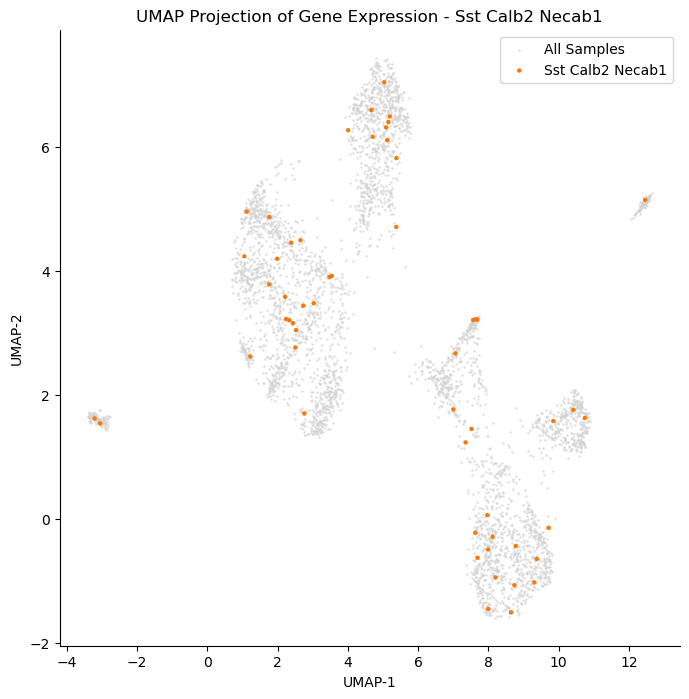

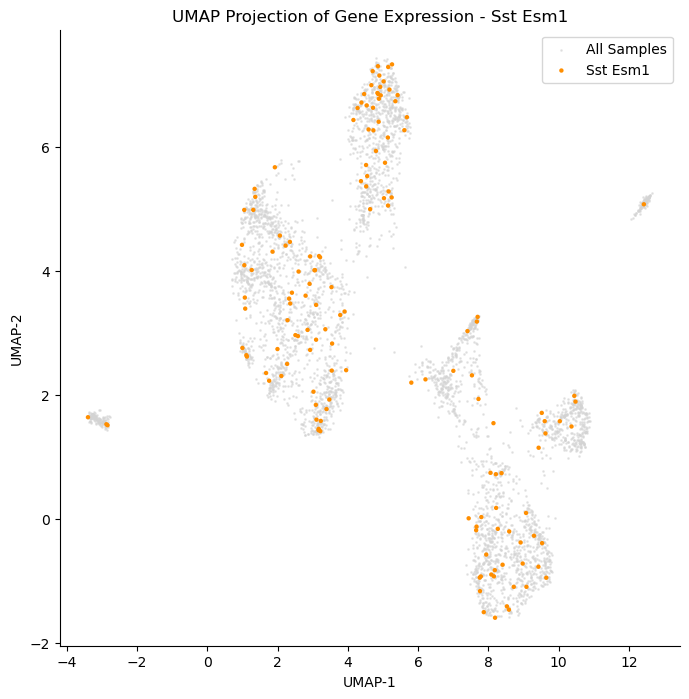

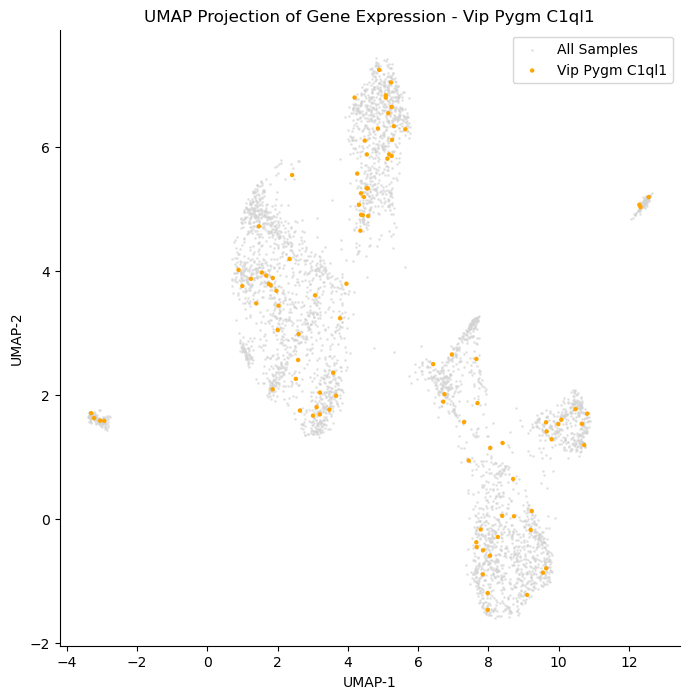

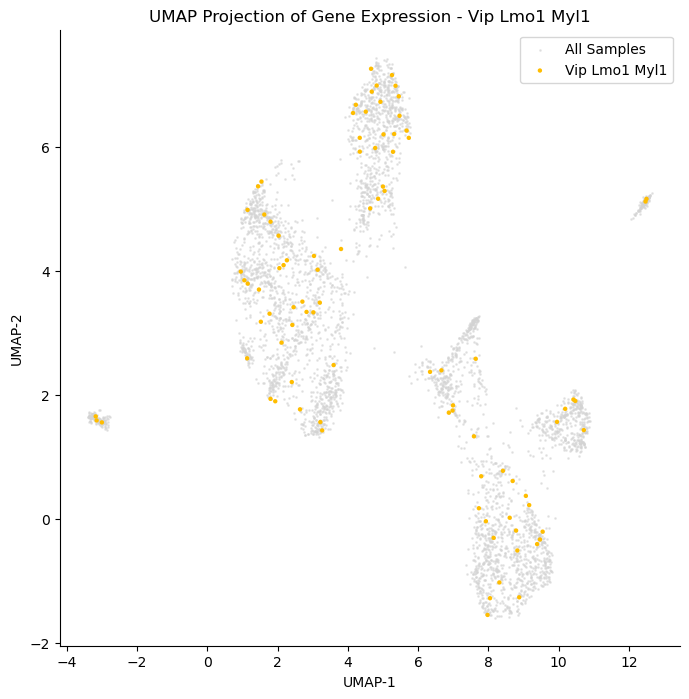

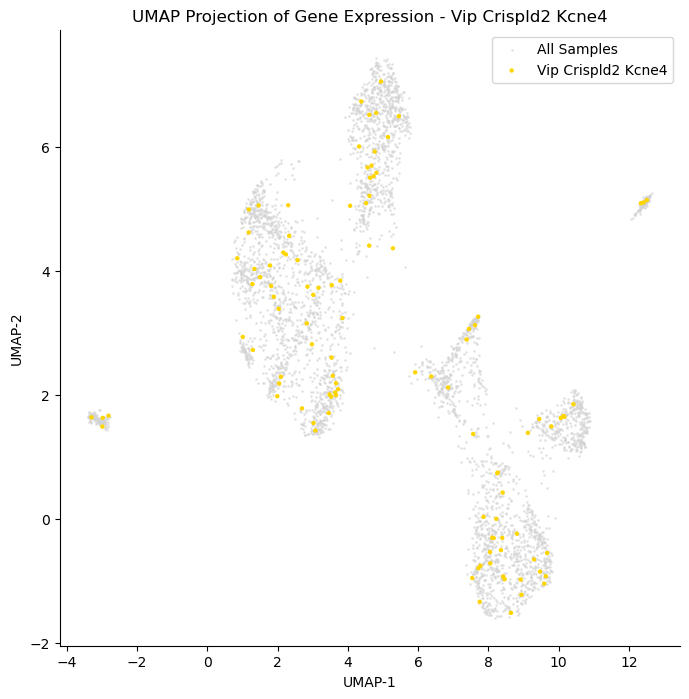

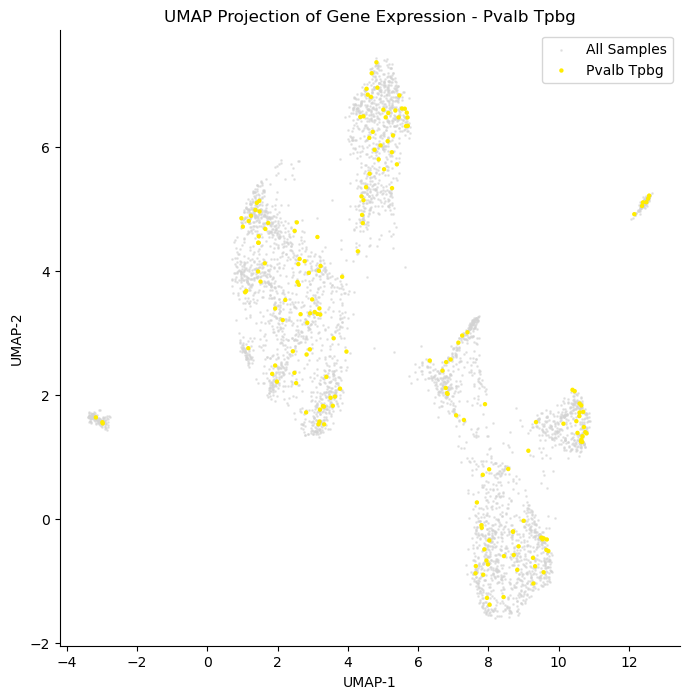

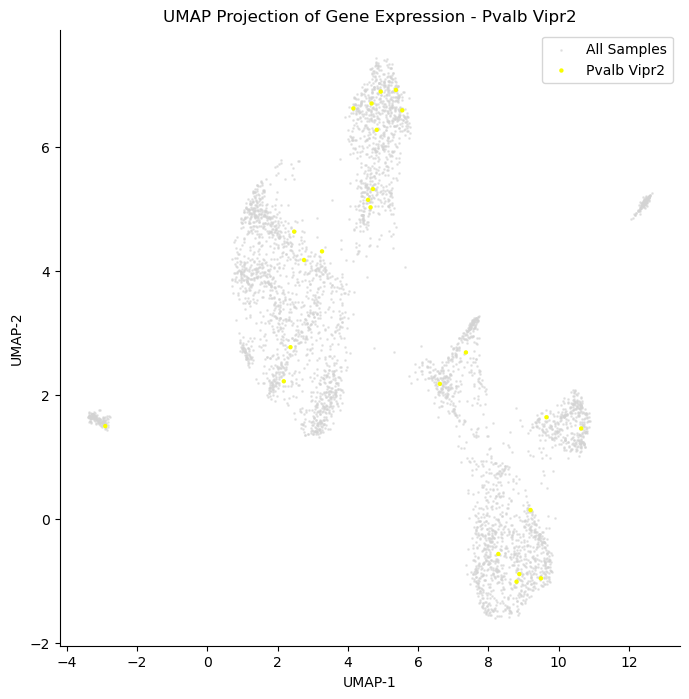

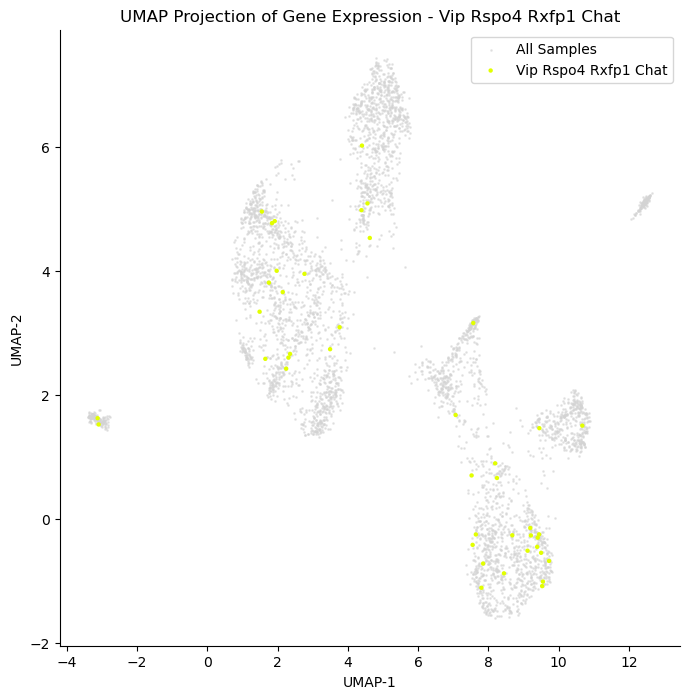

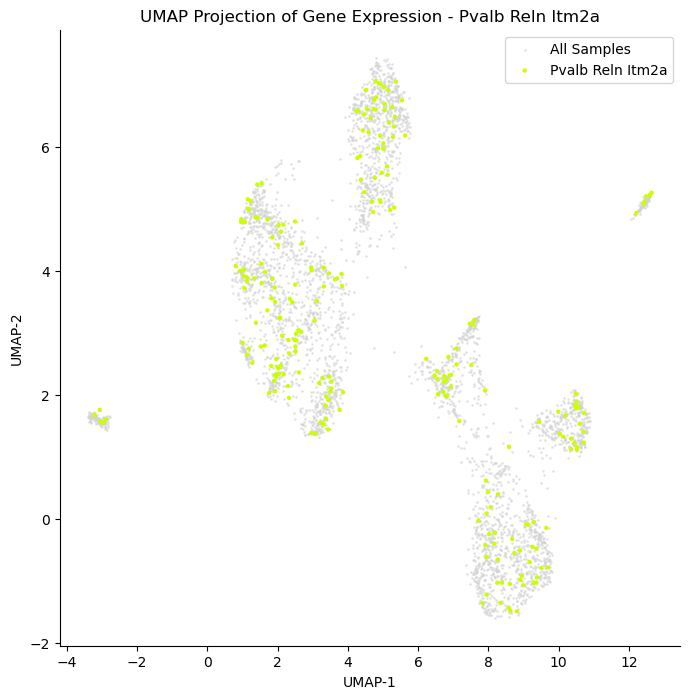

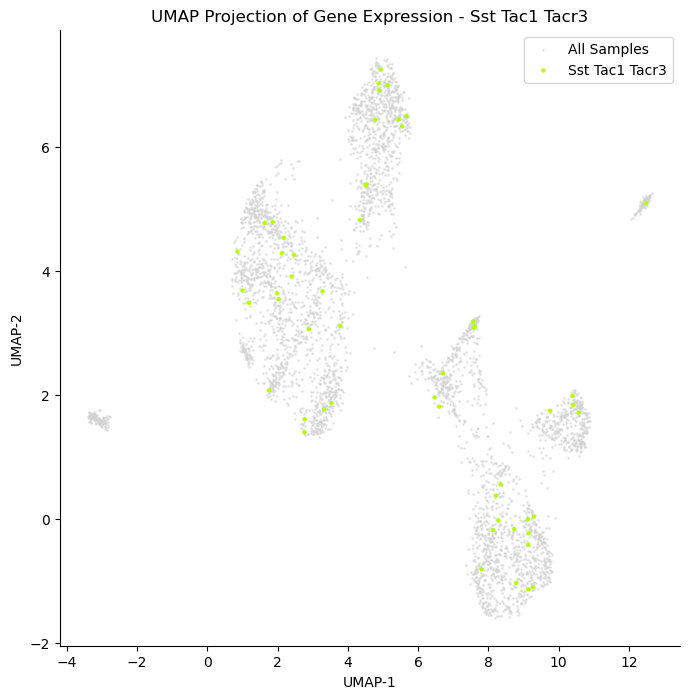

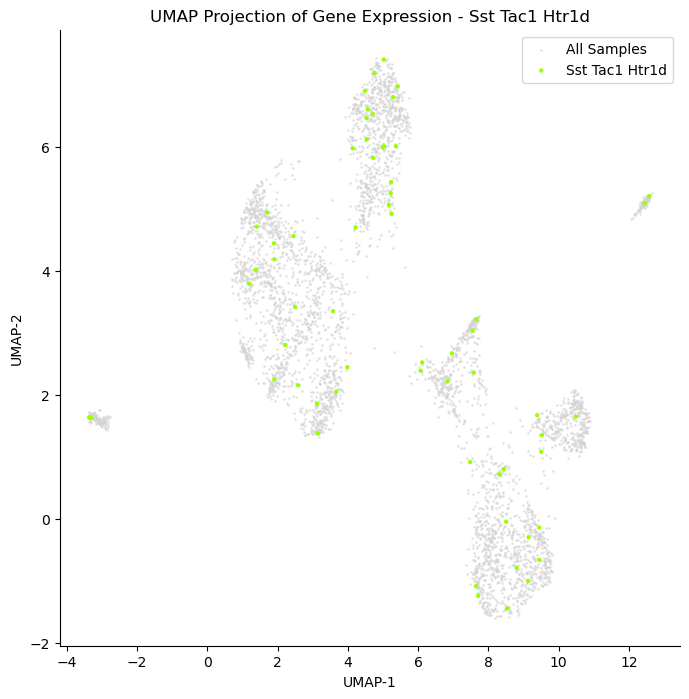

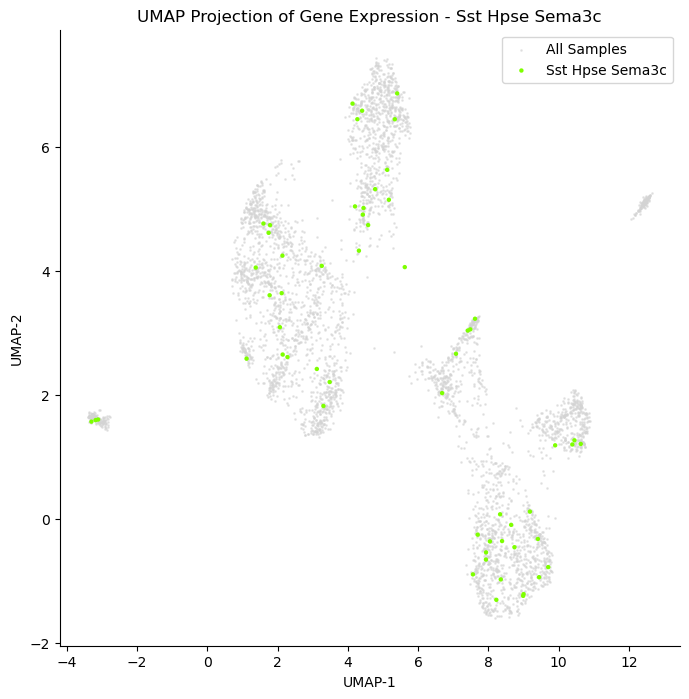

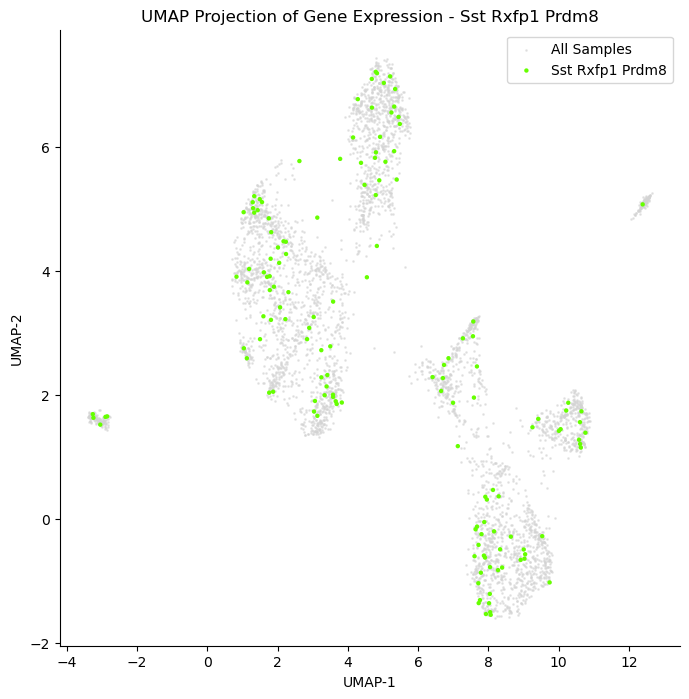

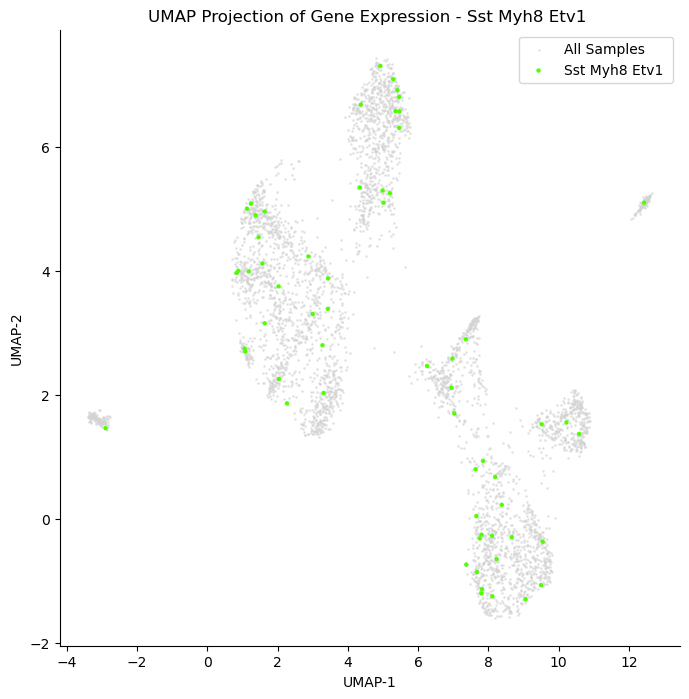

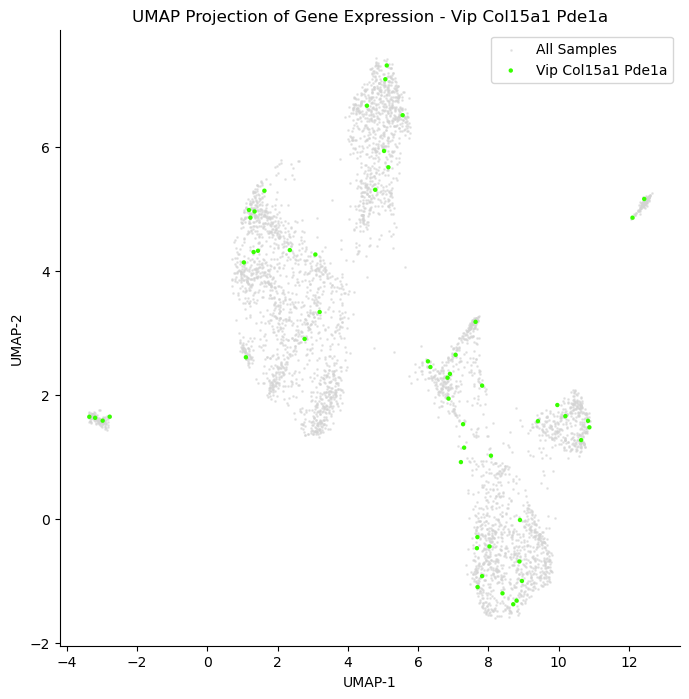

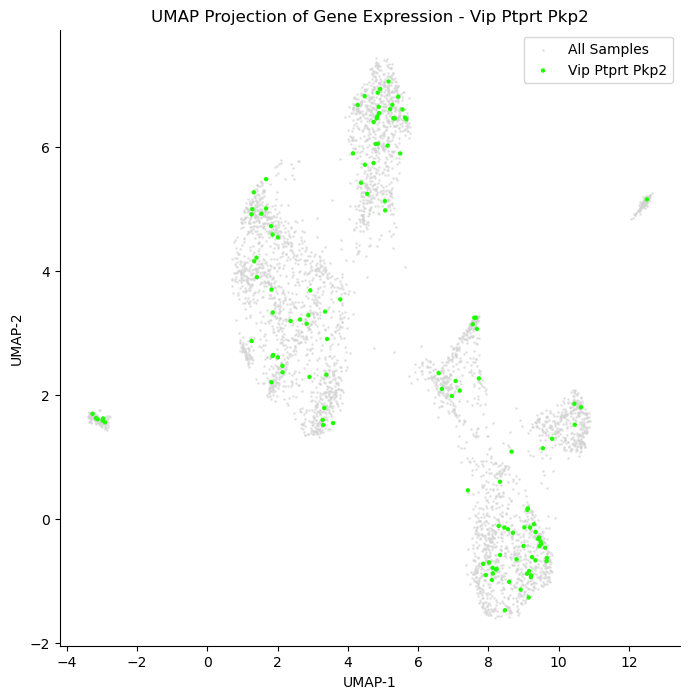

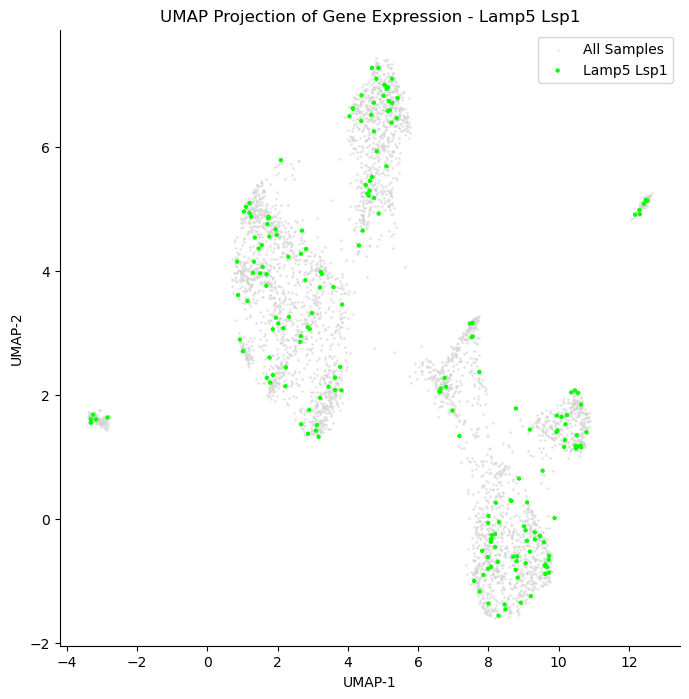

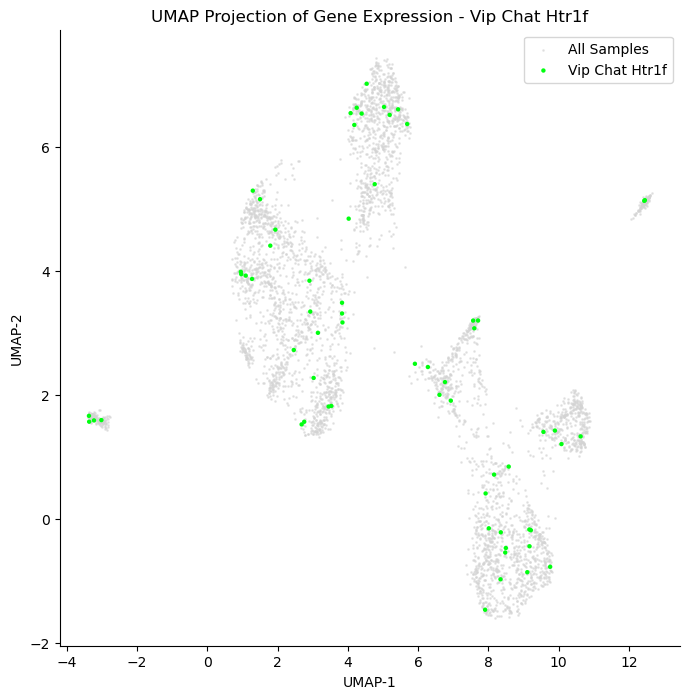

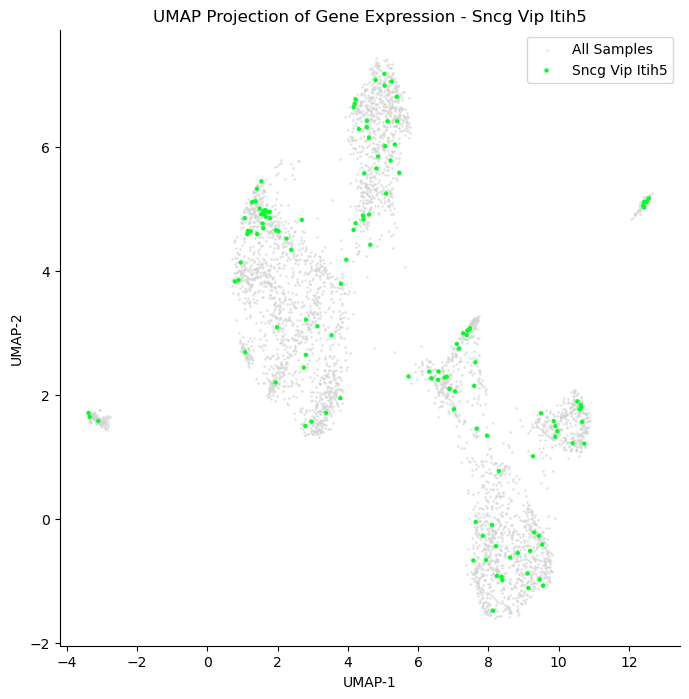

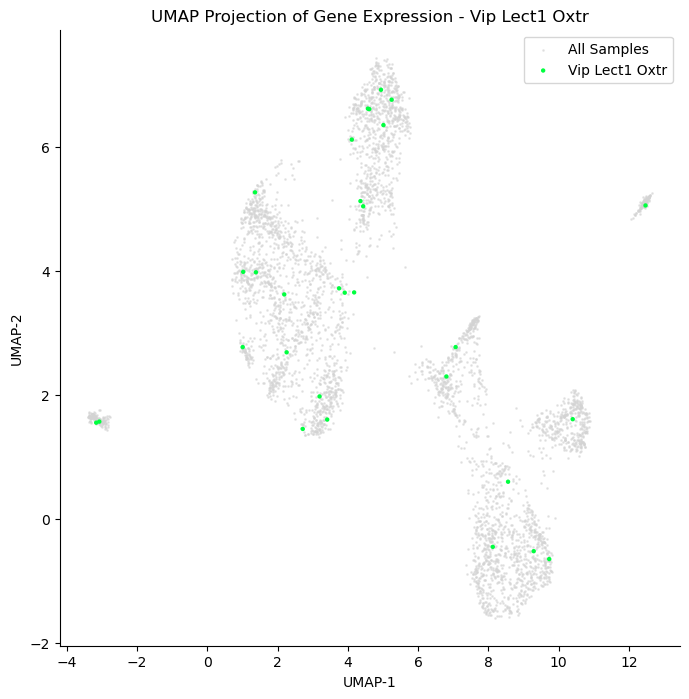

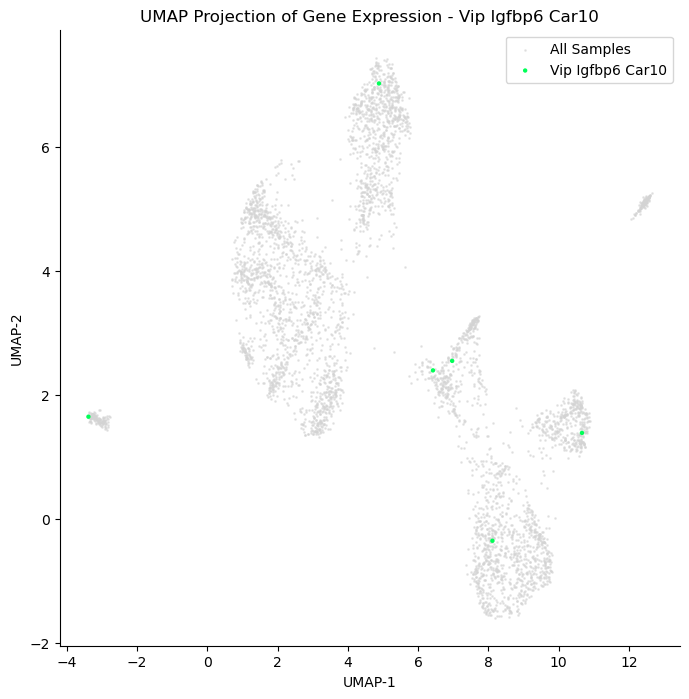

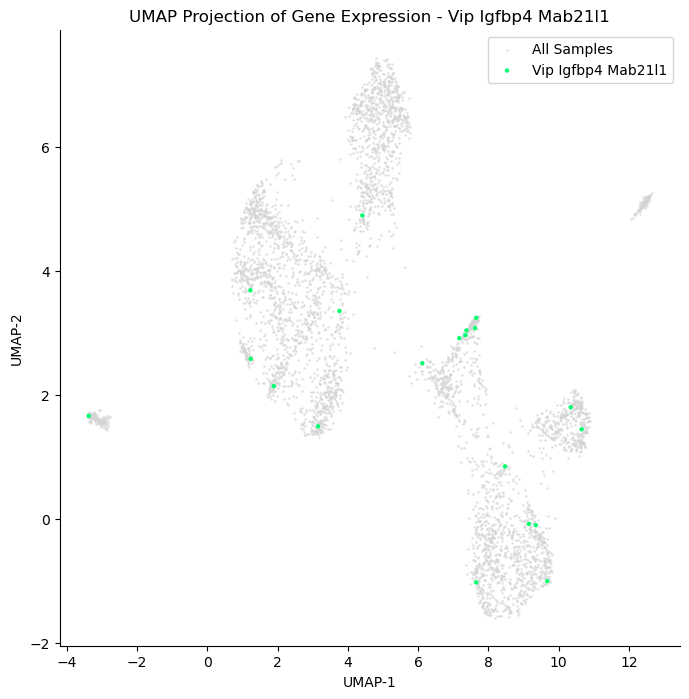

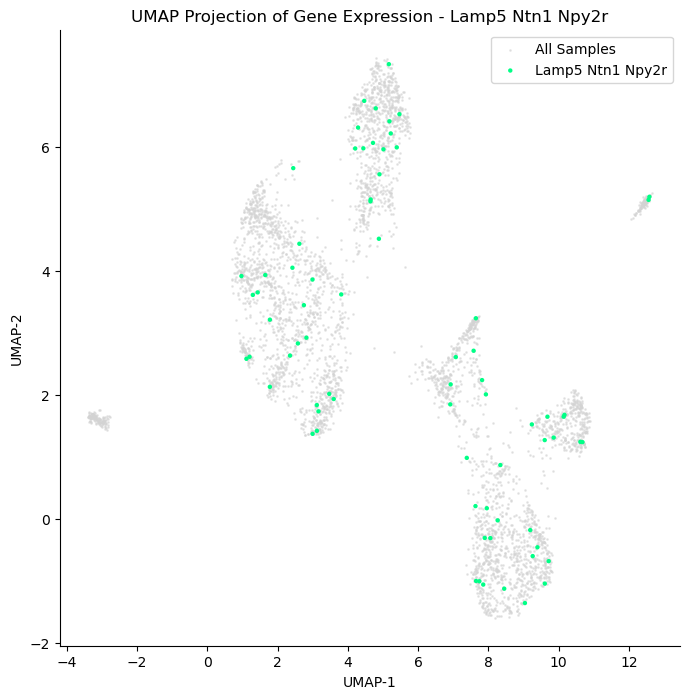

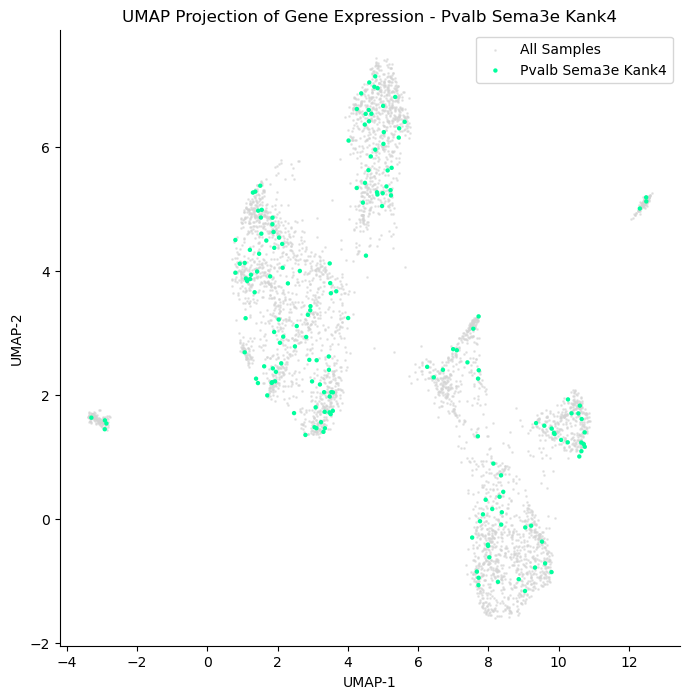

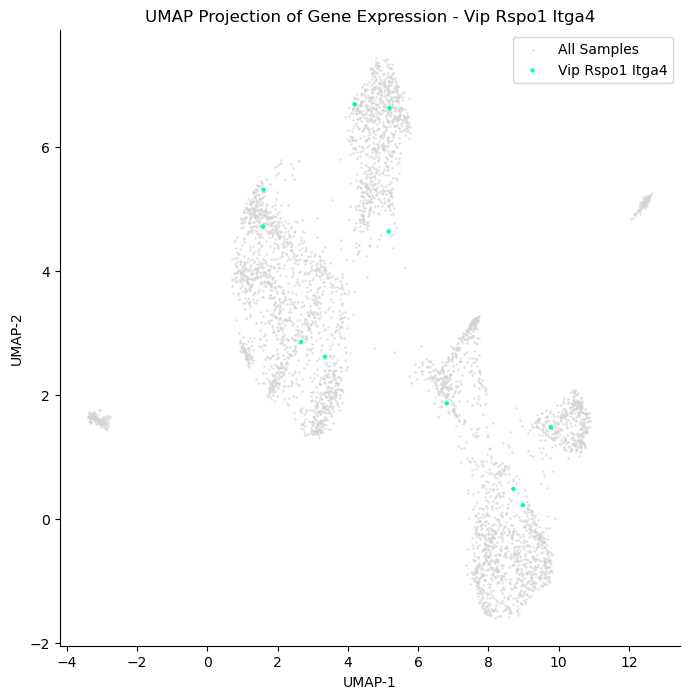

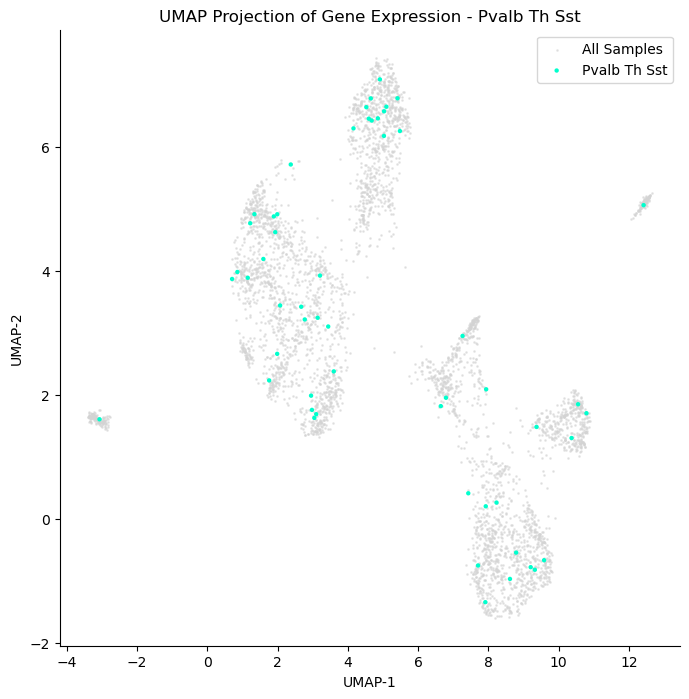

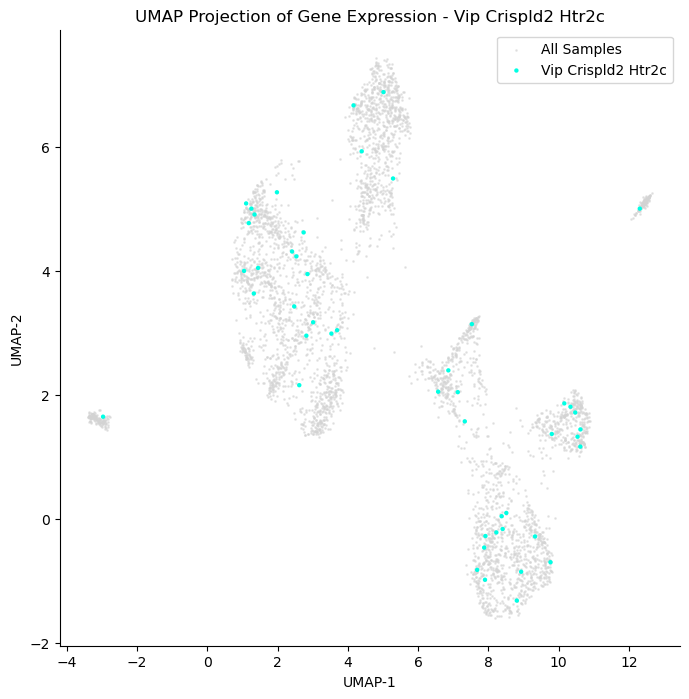

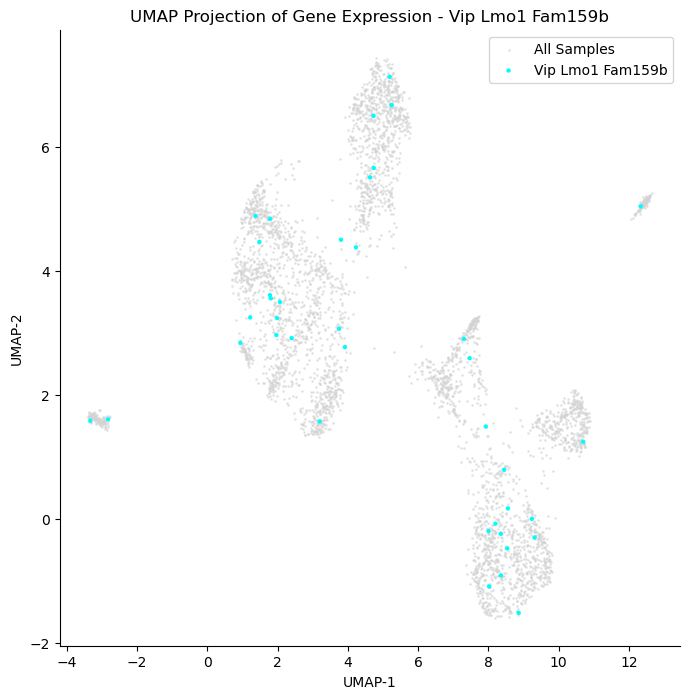

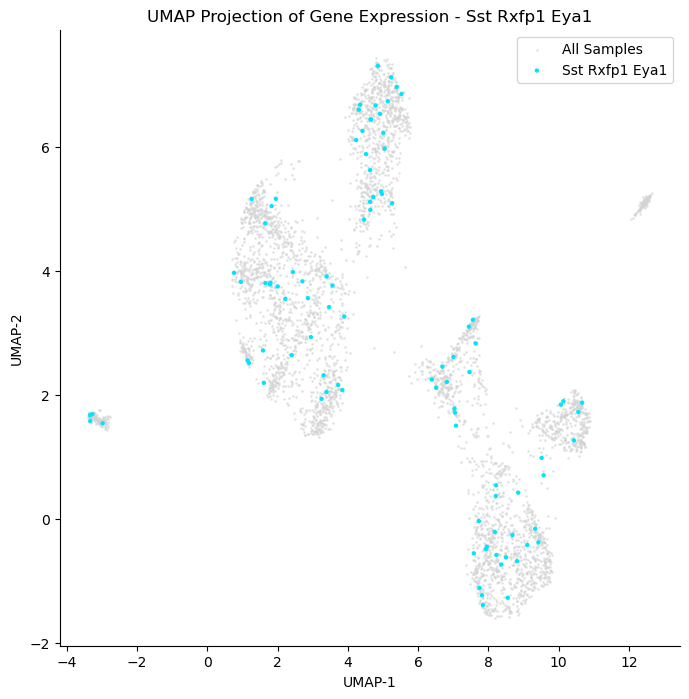

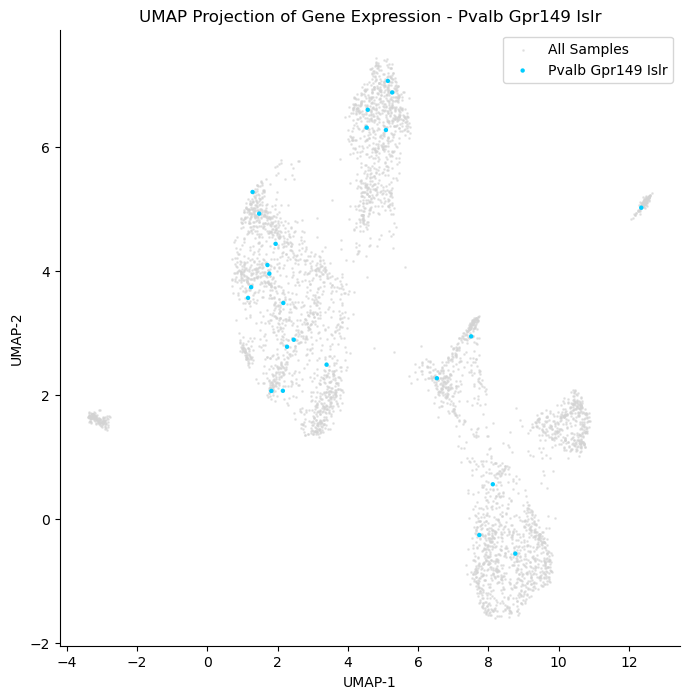

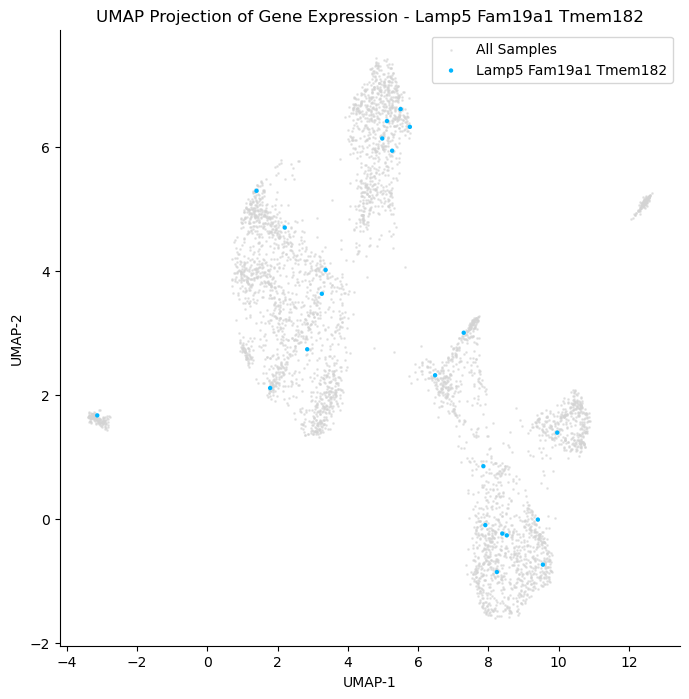

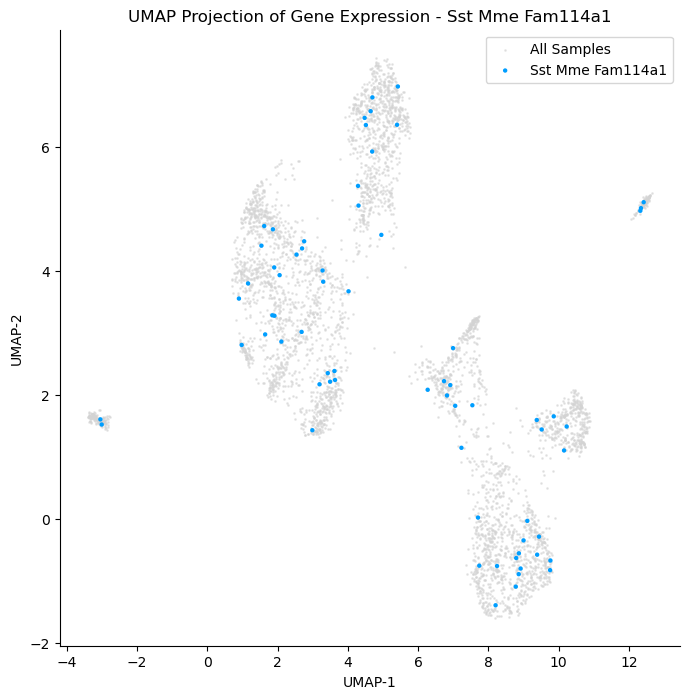

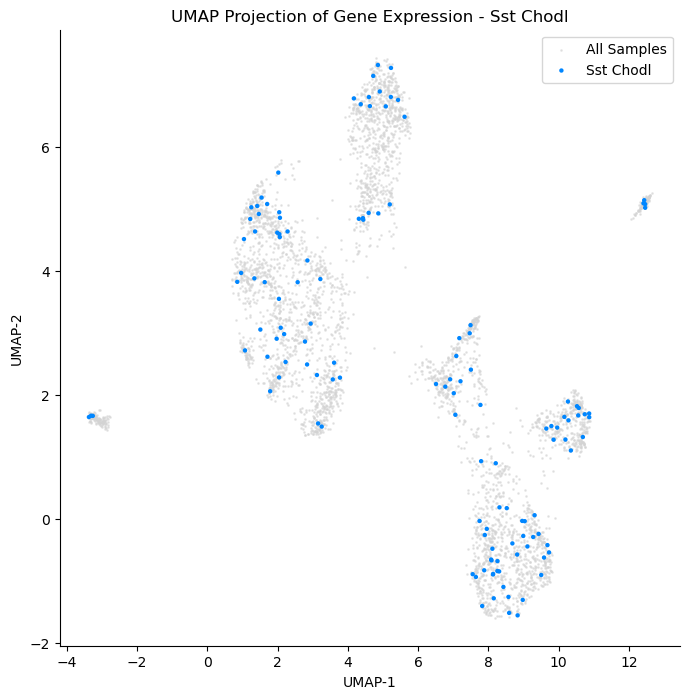

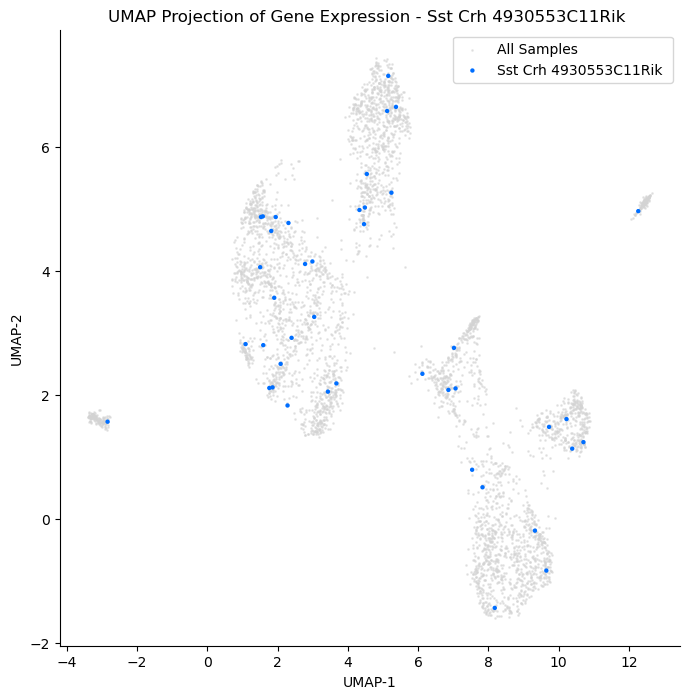

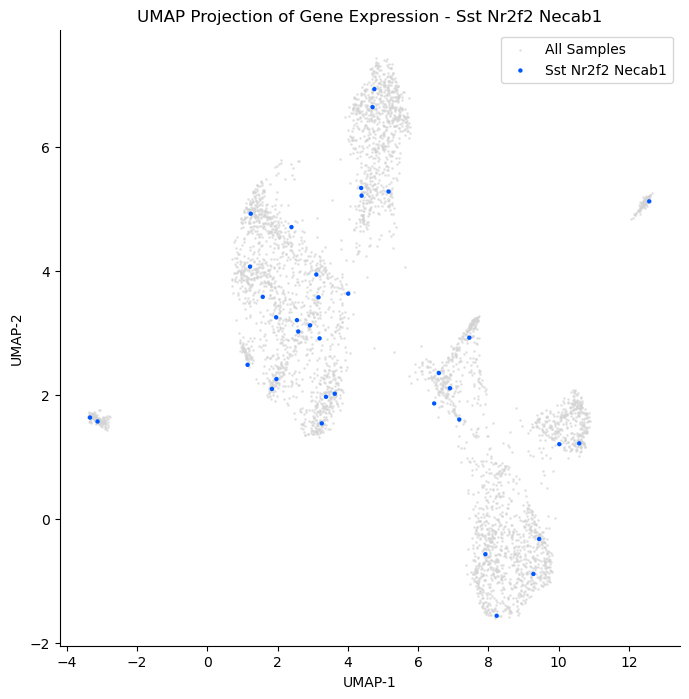

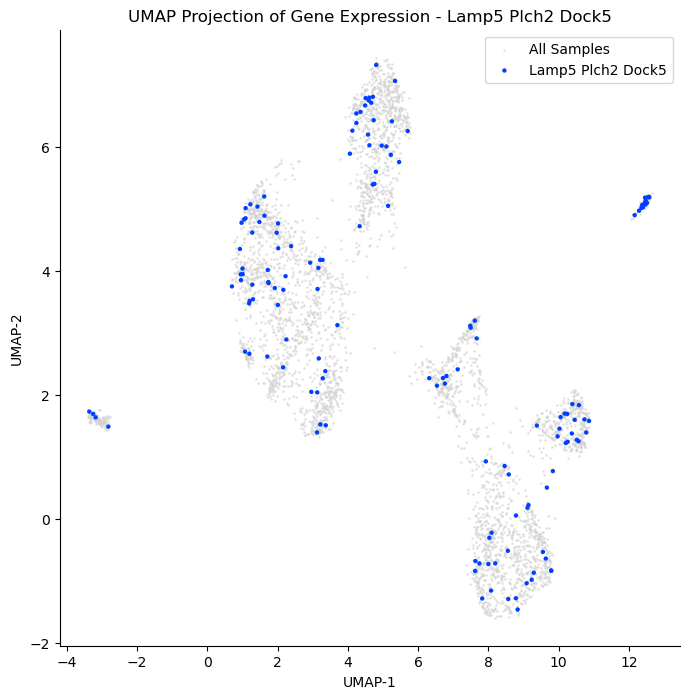

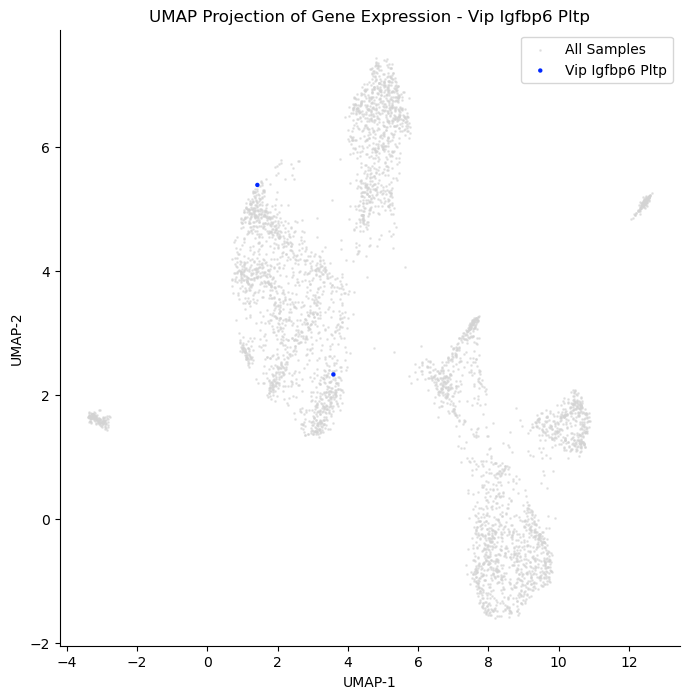

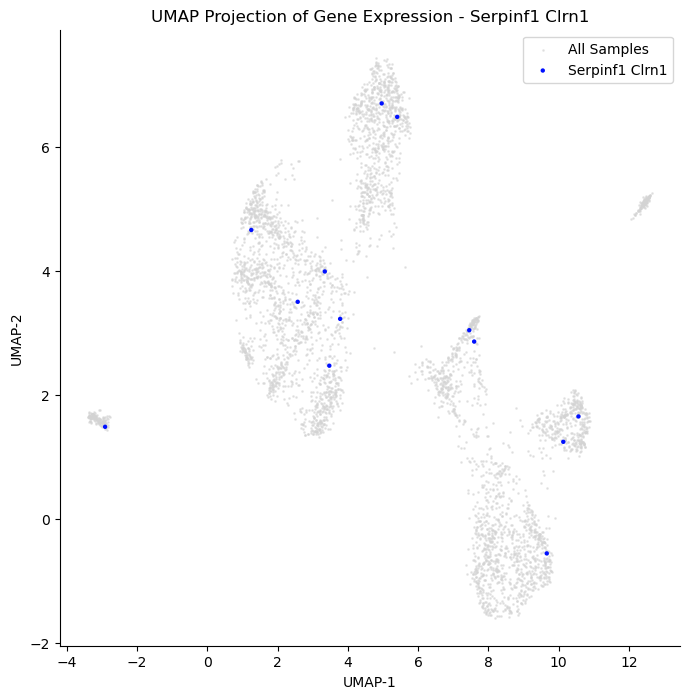

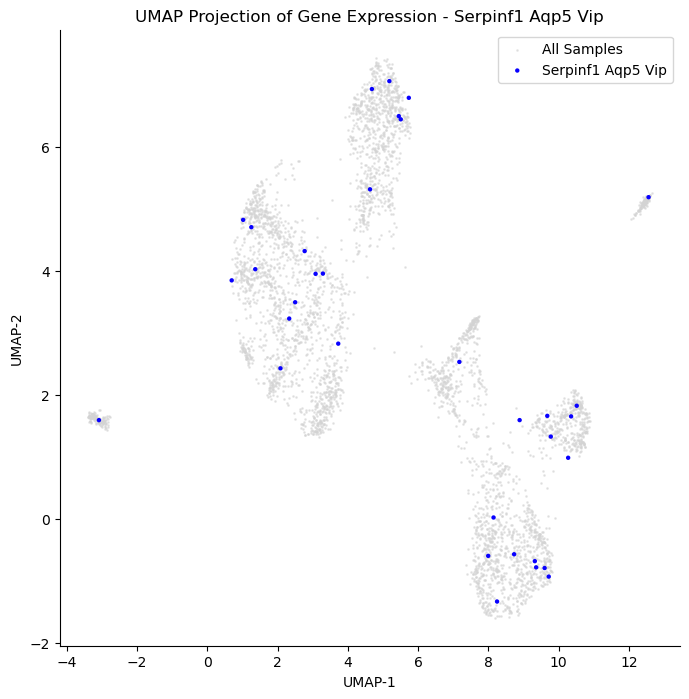

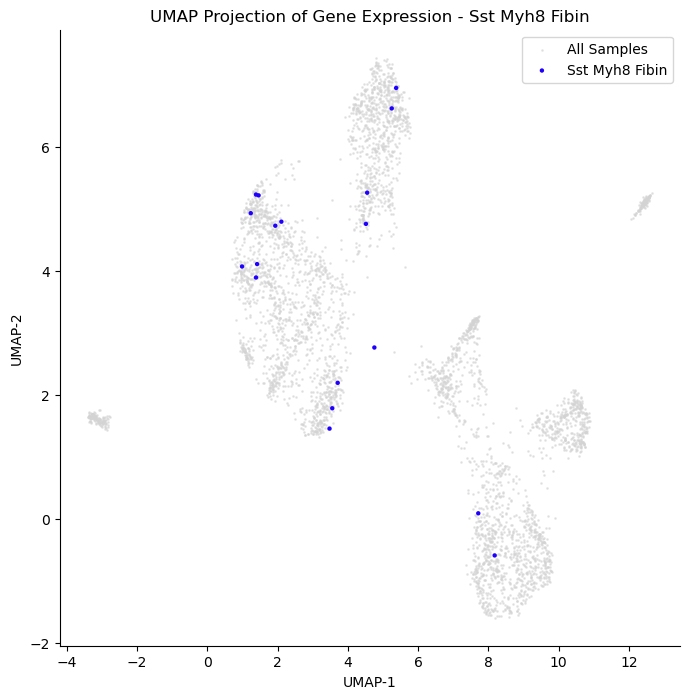

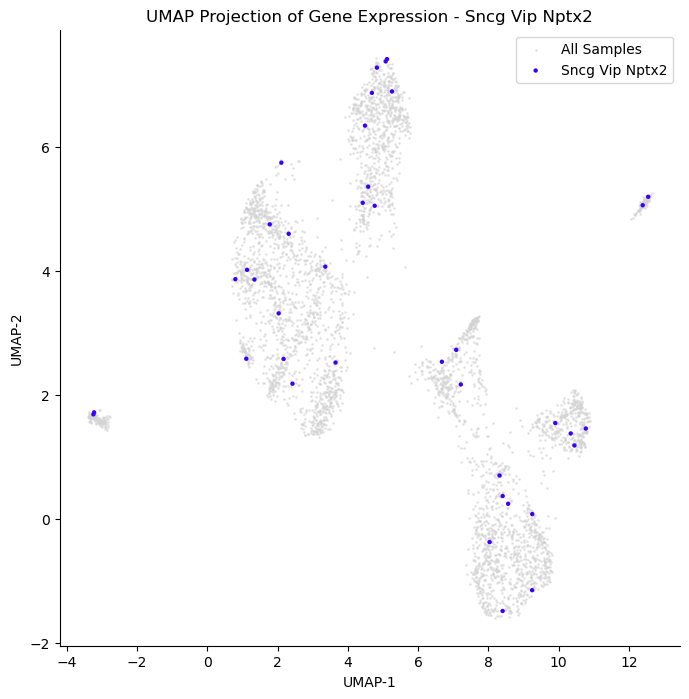

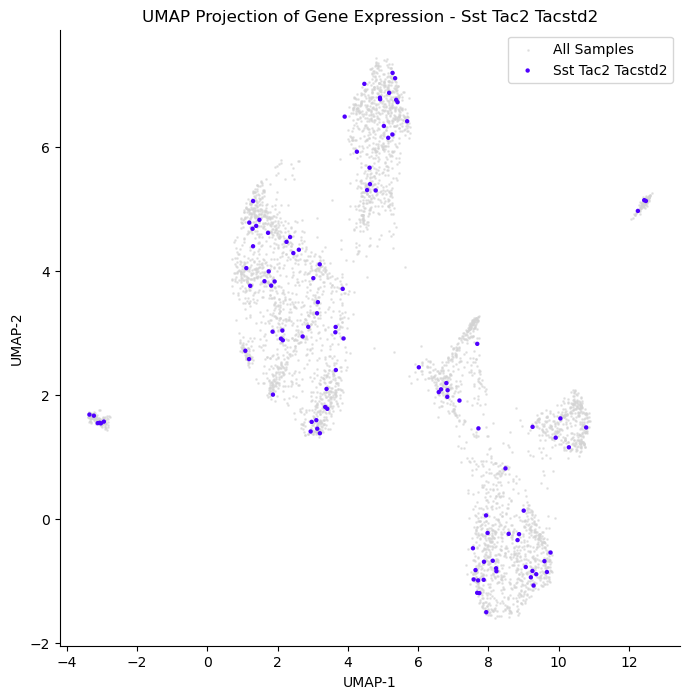

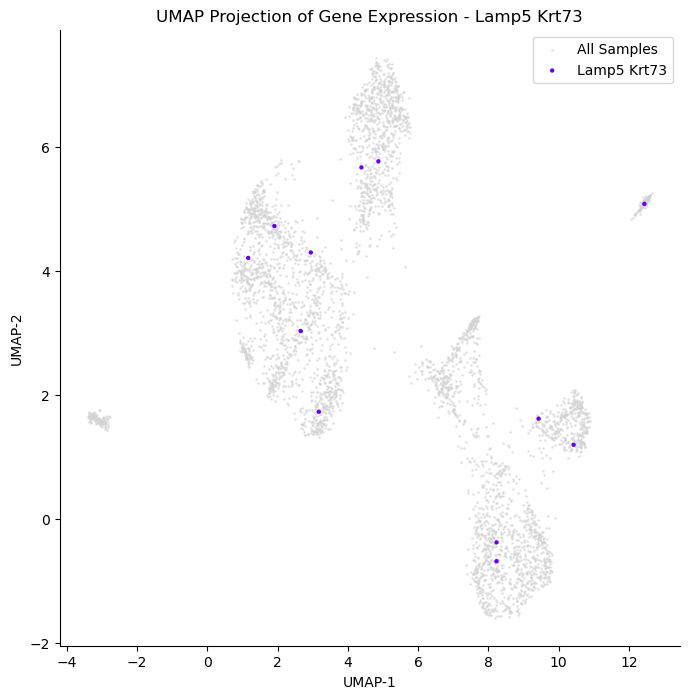

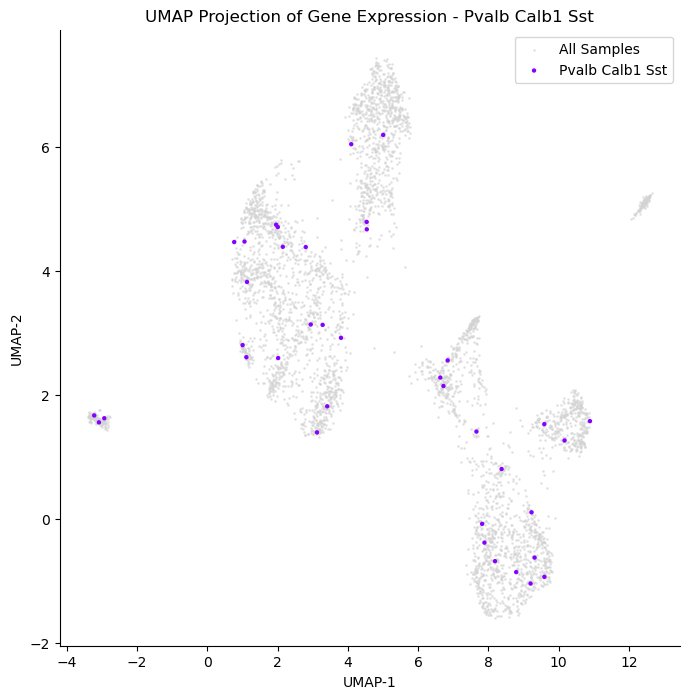

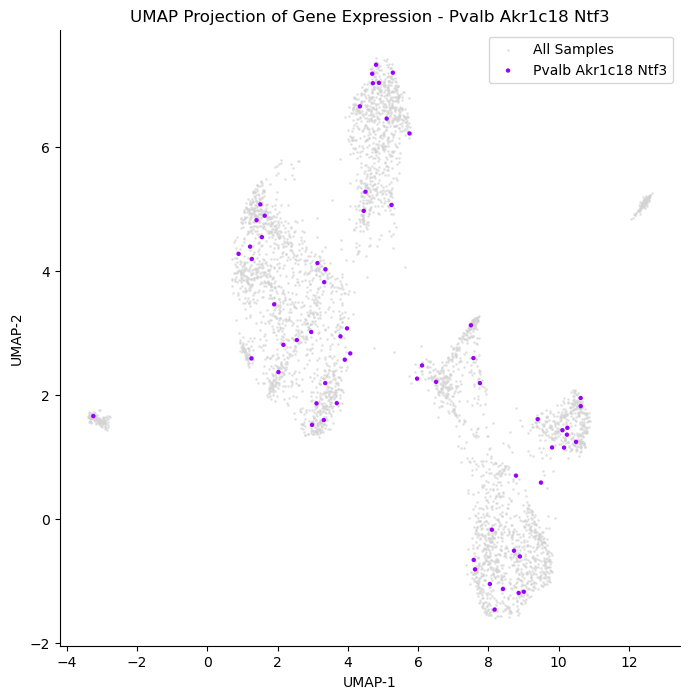

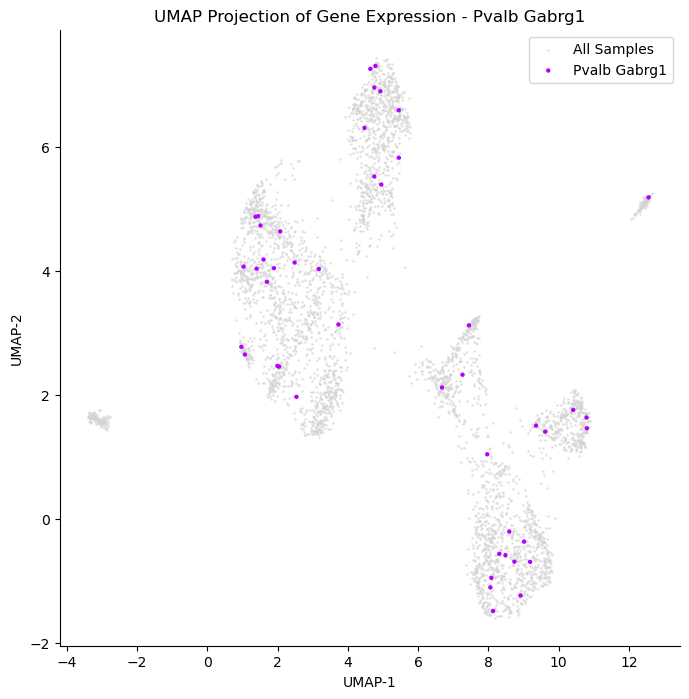

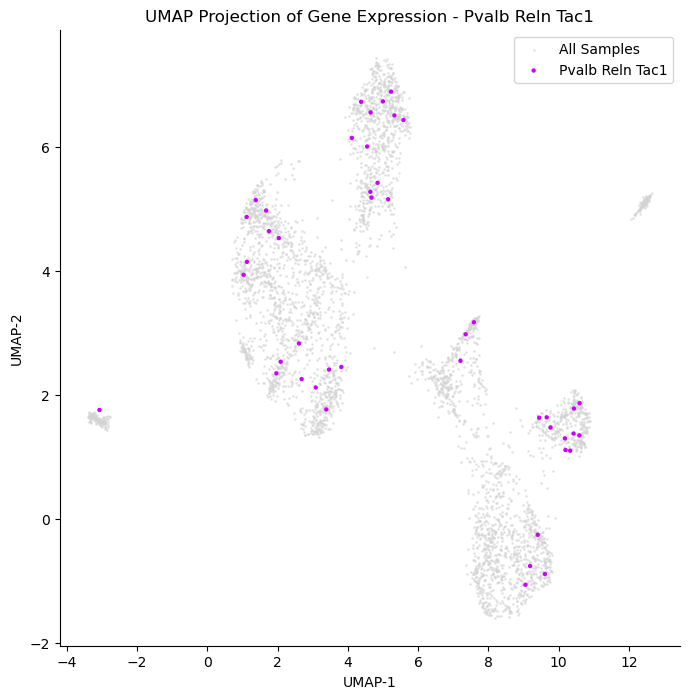

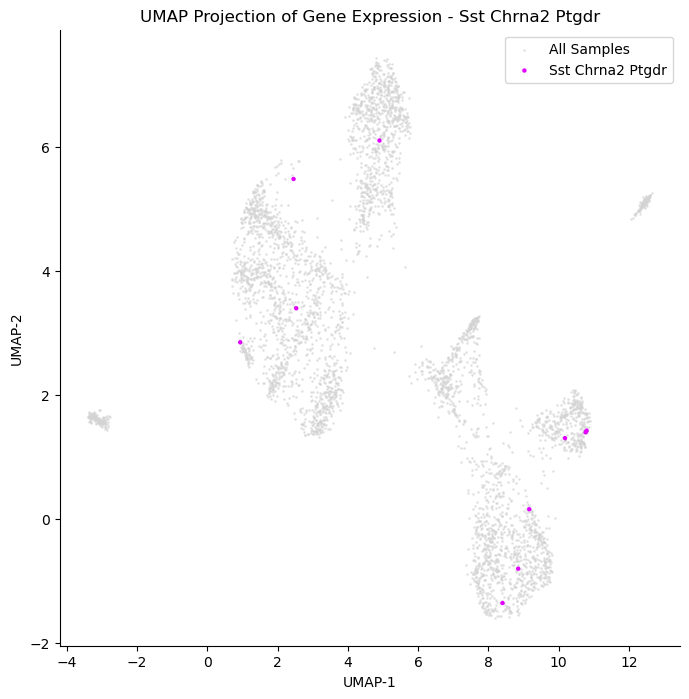

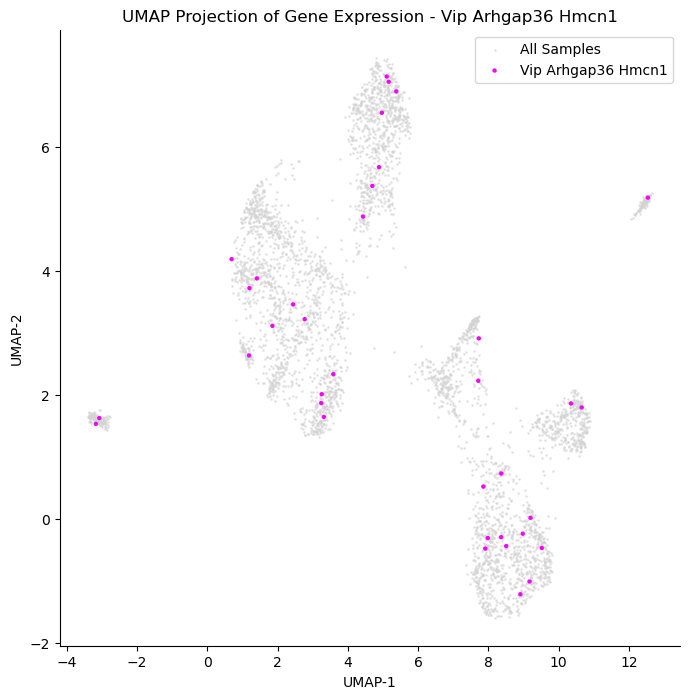

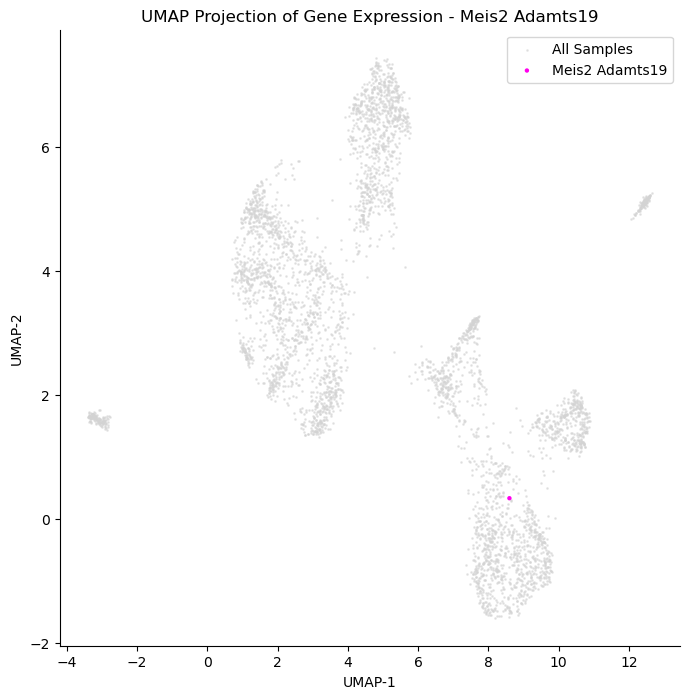

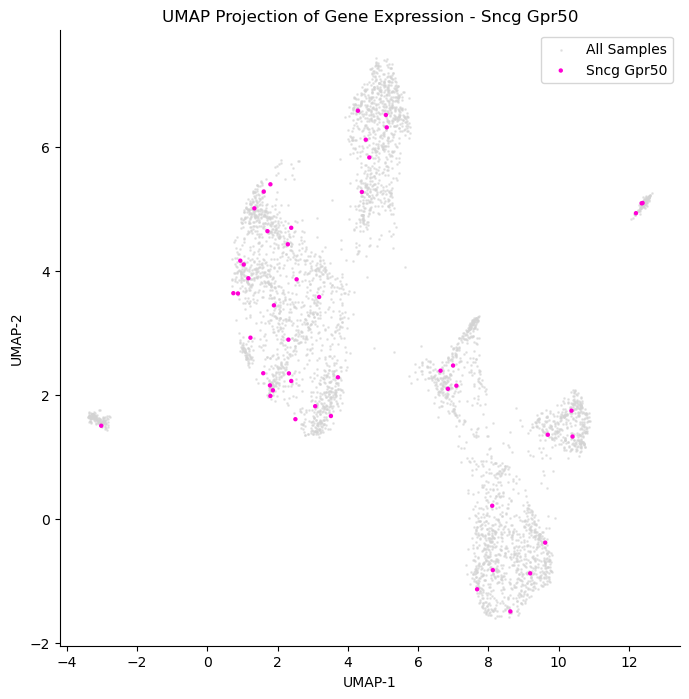

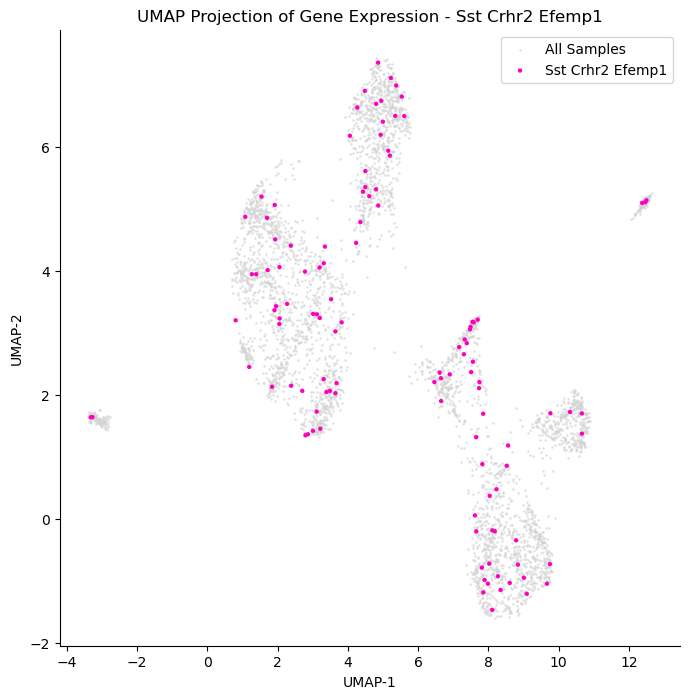

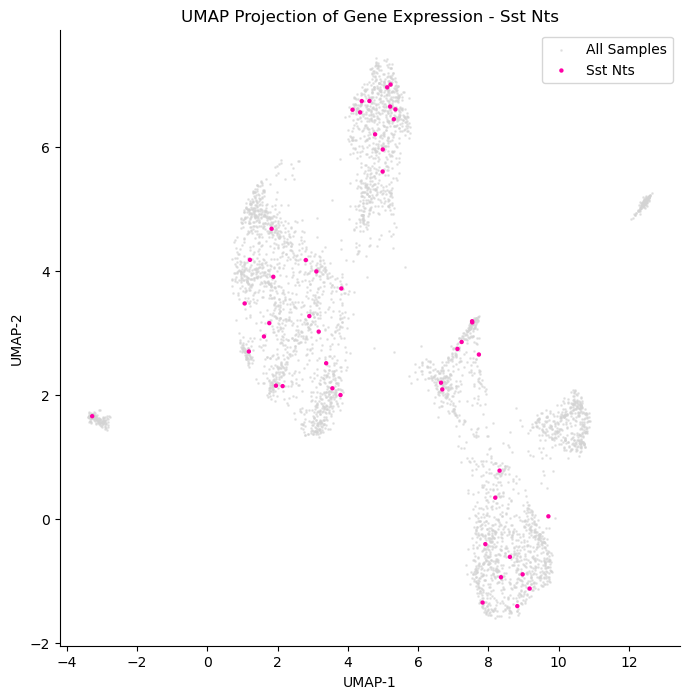

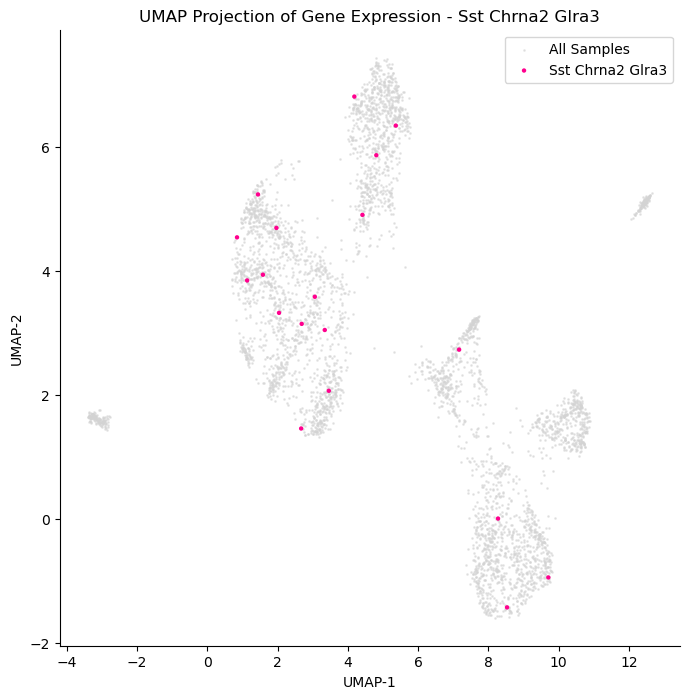

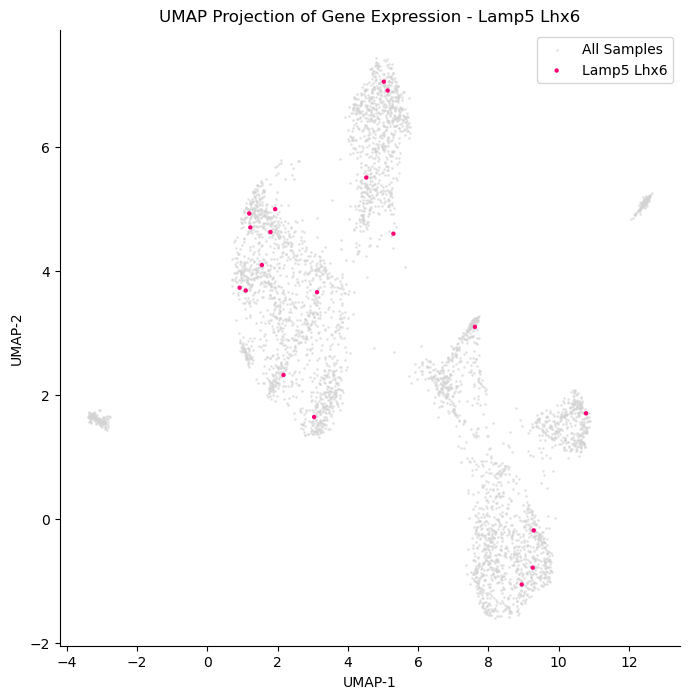

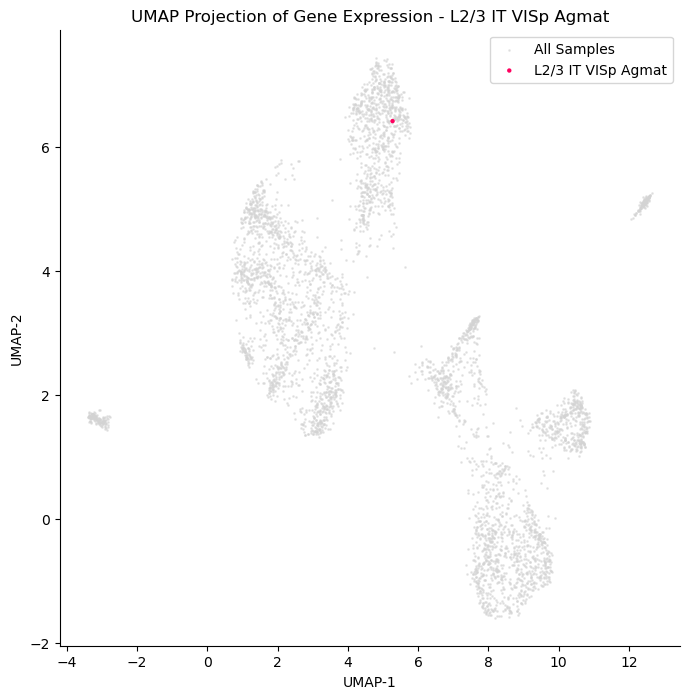

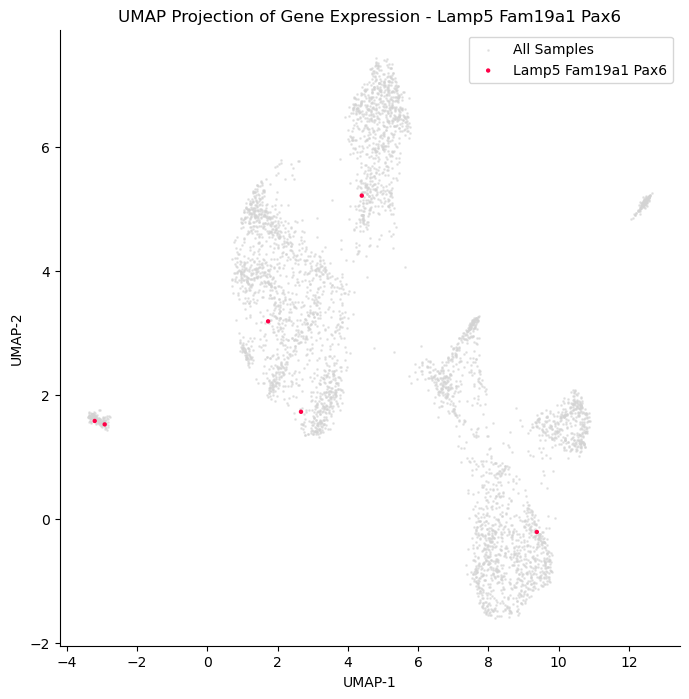

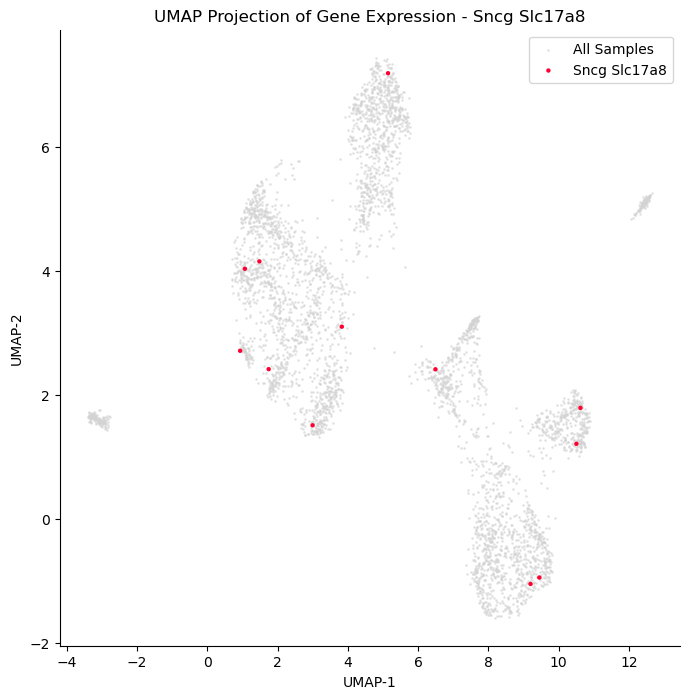

In [36]:
for t_type in unique_t_types:
    # 创建一个布尔数组，表示每个样本是否属于当前 T-type
    sample_mask = metadata['T-type Label'] == t_type

    # 绘图
    plt.figure(figsize=(8, 8))
    # 绘制所有样本的背景
    plt.scatter(embedding[:, 0], embedding[:, 1], s=1, color='lightgray', alpha=0.5, label='All Samples')
    # 绘制特定 T-type 的样本
    plt.scatter(embedding[sample_mask, 0], embedding[sample_mask, 1], color=t_type_to_color[t_type], s=10, edgecolor='none', label=f'{t_type}')

    plt.title(f'UMAP Projection of Gene Expression - {t_type}')
    plt.xlabel('UMAP-1')
    plt.ylabel('UMAP-2')
    plt.legend()
    sns.despine()  # 使用 seaborn 的 despine 函数去除边框
    plt.show()


In [39]:
# 为T-type创建一个颜色映射
unique_t_types = metadata['T-type Label'].dropna().unique()  # 排除缺失值
color_palette = sns.color_palette("hsv", len(unique_t_types))  # 使用HSV颜色空间生成足够的颜色
t_type_color_map = {t_type: color for t_type, color in zip(unique_t_types, color_palette)}

# 为每个样本分配颜色
sample_colors = metadata['T-type Label'].map(t_type_color_map).tolist()


In [40]:
# 使用fillna方法为缺失颜色的标签提供默认颜色（如灰色）
default_color = 'gray'
sample_colors = metadata['T-type Label'].map(t_type_color_map).fillna(default_color).tolist()


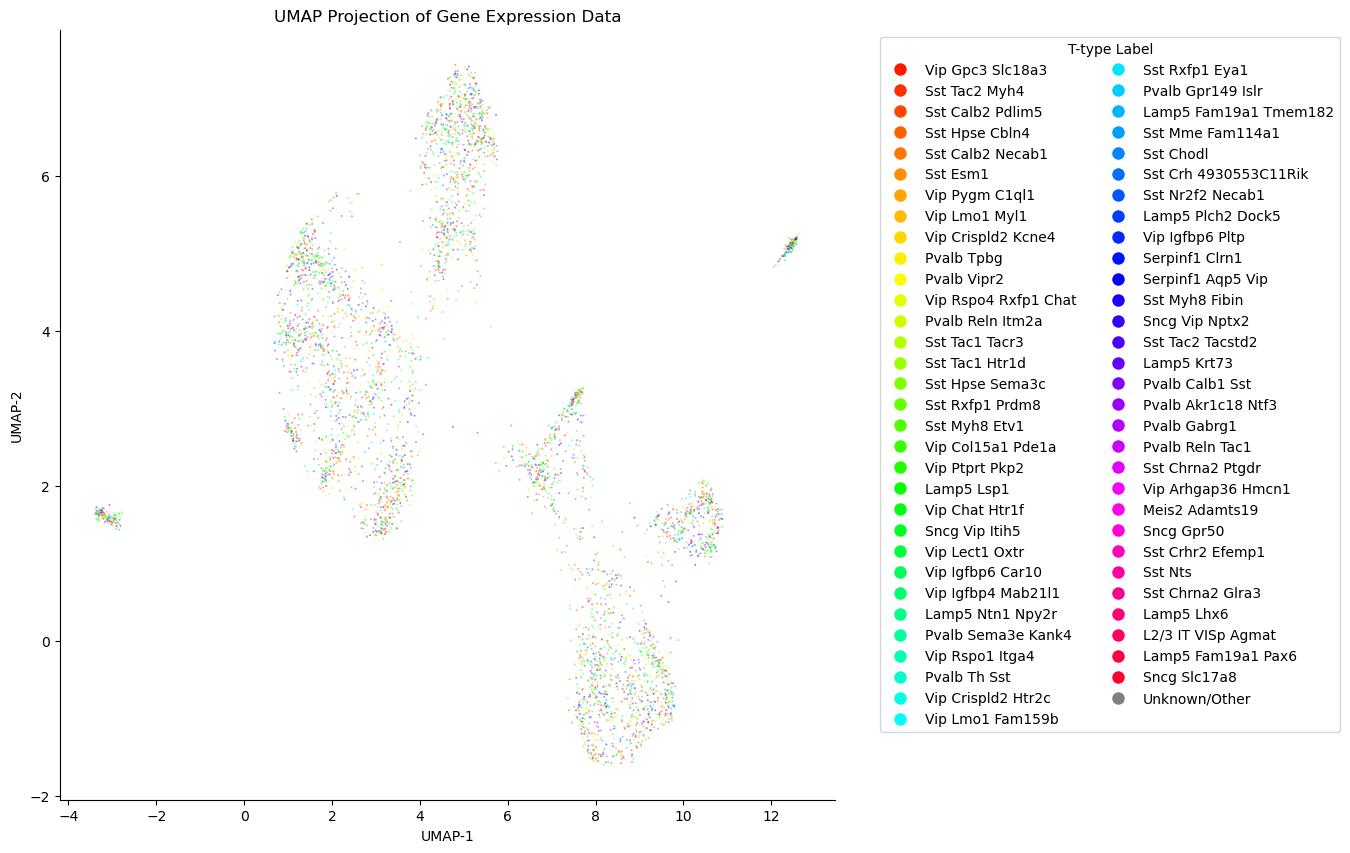

In [41]:
plt.figure(figsize=(10, 10))

# 使用修正后的颜色映射绘制UMAP图
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=2,
    color=sample_colors,  # 使用包含默认颜色的颜色映射
    edgecolor="none",
    alpha=0.5
)

# 创建图例
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='') for color in color_palette + [default_color]]
labels = list(unique_t_types) + ['Unknown/Other']
plt.legend(handles, labels, title='T-type Label', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.title('UMAP Projection of Gene Expression Data')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
sns.despine()
plt.show()

In [77]:
# 确保 cell_specimen_id 是正确的数据类型（如果需要的话，进行转换）
file_manifest['cell_specimen_id'] = file_manifest['cell_specimen_id'].astype(float)


In [78]:
# 假设 combined_data 是之前包含 gene_data 和 metadata 的 DataFrame
combined_data_with_files = combined_data.join(file_manifest.set_index('cell_specimen_id'), on='cell_specimen_id')

KeyError: 'cell_specimen_id'

In [ ]:
# 例如，筛选出包含特定文件类型的样本
electrophysiology_samples = combined_data_with_files[combined_data_with_files['file_type'] == 'nwb']

# 查看这些样本的多巴胺受体基因表达
print(electrophysiology_samples.loc[dopamine_genes])


In [59]:
# 计算每个基因的平均表达量
gene_means = gene_data.mean(axis=1)

# 过滤掉平均表达量低于某个阈值的基因，例如阈值设置为1
filtered_genes = gene_data.loc[gene_means > 1]

# 显示过滤后的数据
print(filtered_genes.head())


               PS0810_E1-50_S88  PS0817_E1-50_S19  PS0817_E1-50_S25  \
0610007P14Rik               0.0               0.0          0.000000   
0610009B22Rik               0.0               0.0         69.658825   
0610009E02Rik               0.0               0.0          0.000000   
0610009L18Rik               0.0               0.0          0.000000   
0610009O20Rik               0.0               0.0          0.000000   

               PS0817_E1-50_S26  PS0817_E1-50_S27  PS0817_E1-50_S28  \
0610007P14Rik        152.239614        165.312294         58.189895   
0610009B22Rik          0.000000          0.000000          0.000000   
0610009E02Rik          0.000000          0.000000          1.662568   
0610009L18Rik          0.000000          0.000000          0.000000   
0610009O20Rik          0.000000          0.000000          3.325137   

               PS0817_E1-50_S46  PS0817_E1-50_S52  PS0830_E1-50_S17  \
0610007P14Rik          0.000000          0.000000         551.71563   
0610

In [60]:
# 多巴胺受体基因列表
dopamine_genes = ['Drd1', 'Drd2', 'Drd3', 'Drd4', 'Drd5']

# 筛选出多巴胺受体基因的表达数据
dopamine_expression = gene_data.loc[dopamine_genes]


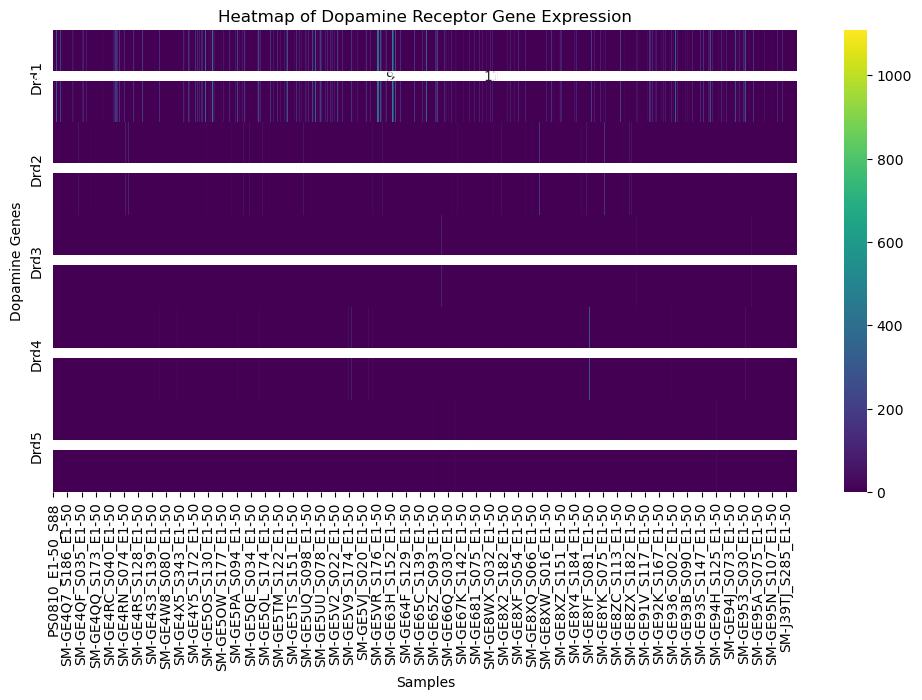

In [61]:
plt.figure(figsize=(12, 6))
sns.heatmap(dopamine_expression, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Dopamine Receptor Gene Expression')
plt.xlabel('Samples')
plt.ylabel('Dopamine Genes')
plt.show()


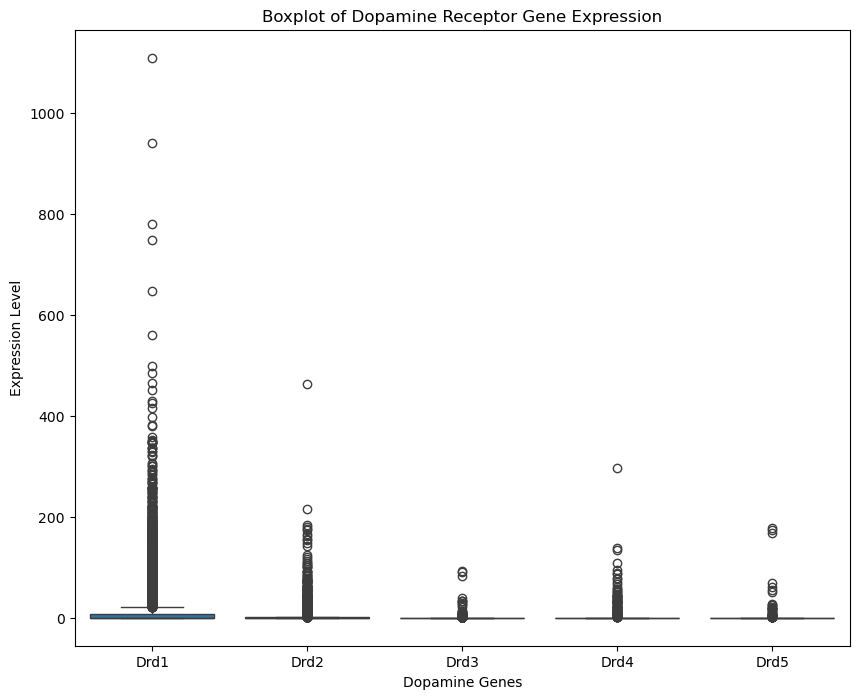

In [62]:
dopamine_expression = dopamine_expression.transpose()  # 转置，使基因成为列，便于绘制箱线图
plt.figure(figsize=(10, 8))
sns.boxplot(data=dopamine_expression)
plt.title('Boxplot of Dopamine Receptor Gene Expression')
plt.xlabel('Dopamine Genes')
plt.ylabel('Expression Level')
plt.show()


In [ ]:
my_ttype_with_recon_metadata = metadata.loc[
    (metadata["T-type Label"] == "Lamp5 Plch2 Dock5") &
    (metadata["neuron_reconstruction_type"].isin(["full"])),
    :]

In [ ]:
my_ttype_with_recon_metadata.iloc[0, :]

In [ ]:
my_specimen_id = my_ttype_with_recon_metadata.iloc[0, :]["cell_specimen_id"]

nwb_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "nwb"),
    :
]

In [ ]:
nwb_urls["archive_uri"].values[0]

In [ ]:
nwb_path = nwb_urls["file_name"].values[0]
nwb_path

In [ ]:
from ipfx.dataset.create import create_ephys_data_set
from ipfx.data_set_features import extract_data_set_features
from ipfx.utilities import drop_failed_sweeps

data_set = create_ephys_data_set(nwb_file=nwb_path)
drop_failed_sweeps(data_set)
cell_features, sweep_features, cell_record, sweep_records, _, _ = \
    extract_data_set_features(data_set, subthresh_min_amp=-100.0)

In [ ]:
cell_features.keys()


In [ ]:
cell_features["long_squares"].keys()


In [ ]:
cell_features["long_squares"]["rheobase_sweep"]


In [ ]:
cell_features["long_squares"]["rheobase_sweep"]["latency"]


In [ ]:
swp = data_set.sweep(cell_features["long_squares"]["rheobase_sweep"]["sweep_number"])


In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(swp.t, swp.v)
plt.xlabel("time (s)", fontsize=16)
plt.ylabel("membrane potential (mV)", fontsize=16)
sns.despine()

In [ ]:
swc_urls = file_manifest.loc[
    (file_manifest["cell_specimen_id"] == float(my_specimen_id)) &
    (file_manifest["file_type"] == "transformed_swc"),
    :
]

In [ ]:
swc_urls["archive_uri"].values[0]

In [ ]:
!wget ftp://download.brainlib.org:8811/biccn/zeng/pseq/morph/200526/645169930_transformed.swc